<div style="position: absolute; top: 0; right: 0;">
    <img src="https://coursereport-production.imgix.net/uploads/school/logo/62/original/blacksquare-logo.jpg?w=72&h=72" alt="Image">
</div>


# <center> BrainStation Capstone</center>

<div style=" justify-content: center; align-items: center; height: 100%;">
    <div style="text-align: center;">
        <img src="https://th.bing.com/th/id/OIG.SyoBFA29YRW8fF83wapS?w=270&h=270&c=6&r=0&o=5&pid=ImgGn" alt="Image" width="500">
    </div>
</div>


***

# Introduction

Pharmaceutical companies play a crucial role in providing medications that improve the health and well-being of individuals. Understanding how certain drugs are perceived and the sentiment associated with them can provide valuable insights for these companies, enabling them to make informed decisions and drive business success and patient well-being.By conducting sentiment analysis on drug reviews, pharmaceutical companies can gain a deeper understanding of how their products are perceived by users. Sentiment analysis allows them to extract valuable insights from the textual reviews, uncovering the overall sentiment expressed by users towards specific drugs. This information can help pharmaceutical companies identify areas for improvement, optimize their marketing strategies, and enhance customer satisfaction. For example, if a drug receives overwhelmingly positive sentiment, it indicates high user satisfaction, which can be leveraged in marketing campaigns to promote the drug's benefits and build trust among potential customers. Conversely, if negative sentiment is detected, it can serve as an early warning sign of potential issues or side effects, prompting pharmaceutical companies to investigate and address them promptly.Additionally, being able to predict the conditions mentioned in drug reviews can provide pharmaceutical companies with valuable insights into the efficacy and suitability of specific medications for different medical conditions and other pharmaceutical applications. By analyzing the reviews and accurately predicting the associated conditions, pharmaceutical companies can gain a better understanding of which conditions their drugs are commonly prescribed for. This knowledge can inform their decision-making processes, such as optimizing product development strategies, tailoring marketing efforts to specific conditions, and identifying potential areas for future drug development. For example, if a particular drug consistently appears in reviews related to a specific condition, it suggests that the drug is effective in treating that condition, allowing pharmaceutical companies to position it as a suitable treatment option and allocate resources accordingly.

Overall, by leveraging data science techniques such as sentiment analysis and condition prediction on drug reviews, pharmaceutical companies can derive actionable insights that contribute to improved decision-making, enhanced customer experiences, optimized marketing strategies, and the development of targeted and effective treatments. These insights enable pharmaceutical companies to stay competitive in the market, deliver better healthcare solutions, and ultimately improve patient outcomes.

To address these objectives, we have chosen the <b>UCI ML drug review dataset </b> sourced from <b>Kaggle.com</b>. The dataset includes textual reviews and numeric ratings of drugs collected from Drugs.com. It is important to note that text reviews may not always align with the numeric ratings, as extreme positive or negative ratings can sometimes be misleading. Hence, our project focuses on classifying user ratings of drugs based on their textual reviews using traditional machine learning algorithms.

In this project, we will take a comprehensive approach, starting with exploratory data analysis (EDA). The EDA notebook will serve as an introduction to the project, where we will delve into the dataset, examine its structure, and generate insights. We will explore various columns in the data to gain a better understanding of the relationships between different variables. Through this analysis, we will lay the foundation for developing effective methodologies and solutions to address our project's goals.

Overall, our project aims to harness the power of data science techniques to provide pharmaceutical companies with valuable insights into drug perceptions and conditions mentioned in reviews. By leveraging sentiment analysis and predictive modeling, we strive to contribute to the improvement of pharmaceutical products, marketing strategies, and ultimately enhance patient care and satisfaction.


### <center>Data Dictionary


| Column Name   | Description                             |
|---------------|-----------------------------------------|
| uniqueID      | Unique ID assigned to each record        |
| drugName      | Name of the drug                         |
| condition     | Name of the condition                     |
| review        | Patient review                           |
| rating        | Patient rating on a scale of 1 to 10     |
| date          | Date when the review was entered         |
| usefulCount   | Number of users who found the review useful |


## Project Notebooks

Throughout the project, we will utilize separate notebooks to address different aspects of our analysis. These notebooks include:

- **EDA Notebook**: This notebook serves as an introduction to the project, where we will explore the dataset, perform data visualization, and gain insights into drug perceptions and conditions mentioned in reviews.

- **Preprocessing Notebook**: In this notebook, we will preprocess the dataset, including handling missing data, cleaning text reviews, and preparing the data for modeling.

- **Sentiment Modeling Notebook**: Here, we will develop classification models for sentiment analysis. We will train and evaluate different machine learning models to achieve accurate predictions and validate the effectiveness of our methodologies.Finaly, will present the results of our analysis, including model performance metrics, important features, and actionable insights. We will conclude the project by summarizing the key findings, discussing their implications, and suggesting potential areas for further exploration.

- **Condition Classification Modeling Notebook**: Here, we will develop classification models for sentiment analysis and condition prediction. We will train and evaluate different machine learning models to achieve accurate predictions and validate the effectiveness of our methodologies. Finally, will present the results of our analysis, including model performance metrics, important features, and actionable insights. We will conclude the project by summarizing the key findings, discussing their implications, and suggesting potential areas for further exploration.

By organizing our project into separate notebooks, we can maintain clarity, modularity, and a systematic approach throughout the analysis. This structure allows us to focus on each aspect of the project individually while ensuring the coherence and reproducibility of our findings.


**********************

# <center> Drug Review EDA

<center> By Ali Mohammed</center>

## Exploratory Data Analysis (EDA)

In this project, we will take a comprehensive approach, starting with exploratory data analysis (EDA). The EDA notebook will serve as an introduction to the project, where we will delve into the dataset, examine its structure, and generate insights. Through this analysis, we aim to gain a better understanding of the dataset and uncover patterns, trends, and relationships between different variables.

During the EDA phase, we will perform the following tasks:

- **Data Exploration**: We will explore the dataset to understand its overall structure, including the number of observations, features, and data types. We will examine the distribution of ratings, conditions, and other relevant variables to identify any data imbalances or anomalies.

- **Feature Analysis**: We will analyze the features in the dataset to identify their significance and potential impact on our analysis. This will involve investigating factors such as drug names, reviews, ratings, conditions, and other relevant information. We will explore the relationships between these features and look for any correlations or patterns that can provide insights into drug perceptions and conditions mentioned in reviews.

- **Data Visualization**: To gain a visual understanding of the dataset, we will create informative visualizations such as histograms, bar plots, scatter plots, and heatmaps. These visualizations will help us uncover meaningful insights and highlight any noteworthy trends or outliers.

By conducting thorough exploratory data analysis, we aim to lay the foundation for developing effective methodologies and solutions to address the goals of our project. The insights gained from EDA will guide our subsequent steps, including data preprocessing, feature engineering, and the development of classification models for sentiment analysis and condition prediction.


In [1]:
#Imports needed for this section of notebook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud

The data provided from kaggle are in two files. The data is presplit into Train and test files. 

In [2]:
#load train and test DataFrames
df_train = pd.read_csv(r"C:\Users\xaliz\BrainStation\Capstone\Data\drugsComTrain_raw.csv")
df_test = pd.read_csv(r"C:\Users\xaliz\BrainStation\Capstone\Data\drugsComTest_raw.csv")

To begin, I will load both datasets and verify their uniqueness while ensuring they contain the same features. Next, I will concatenate the datasets for easier preprocessing and exploratory data analysis.

In [3]:
df_train.head()

uniqueID                  drugName                     condition  \
0    206461                 Valsartan  Left Ventricular Dysfunction   
1     95260                Guanfacine                          ADHD   
2     92703                    Lybrel                 Birth Control   
3    138000                Ortho Evra                 Birth Control   
4     35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating       date  \
0  "It has no side effect, I take it in combinati...       9  20-May-12   
1  "My son is halfway through his fourth week of ...       8  27-Apr-10   
2  "I used to take another oral contraceptive, wh...       5  14-Dec-09   
3  "This is my first time using any form of birth...       8   3-Nov-15   
4  "Suboxone has completely turned my life around...       9  27-Nov-16   

   usefulCount  
0           27  
1          192  
2           17  
3           10  
4           37

In [4]:
len(df_train)

161297

In [5]:
df_test.head()

uniqueID         drugName                     condition  \
0    163740      Mirtazapine                    Depression   
1    206473       Mesalamine  Crohn's Disease, Maintenance   
2    159672          Bactrim       Urinary Tract Infection   
3     39293         Contrave                   Weight Loss   
4     97768  Cyclafem 1 / 35                 Birth Control   

                                              review  rating       date  \
0  "I&#039;ve tried a few antidepressants over th...      10  28-Feb-12   
1  "My son has Crohn&#039;s disease and has done ...       8  17-May-09   
2                      "Quick reduction of symptoms"       9  29-Sep-17   
3  "Contrave combines drugs that were used for al...       9   5-Mar-17   
4  "I have been on this birth control for one cyc...       9  22-Oct-15   

   usefulCount  
0           22  
1           17  
2            3  
3           35  
4            4

In [6]:
len(df_test)

53766

In [7]:
print ("The shape of the train set given is : ", df_train.shape)
print ("The shape of the test set given is : ", df_test.shape)

The shape of the train set given is :  (161297, 7)
The shape of the test set given is :  (53766, 7)


The training data contains 161297 rows and 7 columns

The test data contains 53766 rows and 7 columns

In [8]:
a = df_train.columns
a

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

List of the columns in train dataframe

In [9]:
b = df_test.columns
b

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

List of the columns in test dataframe

In [10]:
if np.array_equal(a, b):
    print('The columns are the same!')


The columns are the same!


We can see that both Datasets contain the same features. No added features are in the test set.

Now we can concatinate both DataFrames for ease of processing.

In [11]:
df = pd.concat([df_train, df_test])
df.head()

uniqueID                  drugName                     condition  \
0    206461                 Valsartan  Left Ventricular Dysfunction   
1     95260                Guanfacine                          ADHD   
2     92703                    Lybrel                 Birth Control   
3    138000                Ortho Evra                 Birth Control   
4     35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating       date  \
0  "It has no side effect, I take it in combinati...       9  20-May-12   
1  "My son is halfway through his fourth week of ...       8  27-Apr-10   
2  "I used to take another oral contraceptive, wh...       5  14-Dec-09   
3  "This is my first time using any form of birth...       8   3-Nov-15   
4  "Suboxone has completely turned my life around...       9  27-Nov-16   

   usefulCount  
0           27  
1          192  
2           17  
3           10  
4           37

In [12]:
print(f"The dataset begins on {df['date'].min()} and ends on {df['date'].max()}.")

The dataset begins on 1-Apr-08 and ends on 9-Sep-17.


In [13]:
len(df)

215063

We did a length sanity check! The dataset is now concatinated and lets begin with the EDA

# <center>EDA

In [14]:
#description of the data
df.describe()

uniqueID         rating    usefulCount
count  215063.000000  215063.000000  215063.000000
mean   116039.364814       6.990008      28.001004
std     67007.913366       3.275554      36.346069
min         0.000000       1.000000       0.000000
25%     58115.500000       5.000000       6.000000
50%    115867.000000       8.000000      16.000000
75%    173963.500000      10.000000      36.000000
max    232291.000000      10.000000    1291.000000

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215063 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     215063 non-null  int64 
 1   drugName     215063 non-null  object
 2   condition    213869 non-null  object
 3   review       215063 non-null  object
 4   rating       215063 non-null  int64 
 5   date         215063 non-null  object
 6   usefulCount  215063 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 13.1+ MB


In [16]:
# Drop index for uniqueID
df.set_index('uniqueID', inplace=True)

In [17]:
df.dtypes

drugName       object
condition      object
review         object
rating          int64
date           object
usefulCount     int64
dtype: object

We have 4 columns of type Object and 2 columns of type int

In [18]:
df.isnull().any()


drugName       False
condition       True
review         False
rating         False
date           False
usefulCount    False
dtype: bool

The only nulls in this dataset is in the condition column

In [19]:
df['condition'].isnull().value_counts()

False    213869
True       1194
Name: condition, dtype: int64

We only have 1194 missing condition labels, lets take a look at the NULL values

In [20]:
size = df.shape[0]

print ("The size of the dataset is: ", size)

total_na = df.isnull().sum(axis = 0)['condition']
print ("count of NULL values: ", total_na)

print ("Percent Missing is : ", (total_na/size)*100)

The size of the dataset is:  215063
count of NULL values:  1194
Percent Missing is :  0.5551861547546533


In [21]:
df_nulls = df[df.isnull().any(axis=1)]
df_nulls.head()

drugName condition  \
uniqueID                                               
51452                         Azithromycin       NaN   
61073                                 Urea       NaN   
132651                             Doxepin       NaN   
44297     Ethinyl estradiol / norgestimate       NaN   
68697                  Medroxyprogesterone       NaN   

                                                     review  rating  \
uniqueID                                                              
51452        "Very good response. It is so useful for me. "      10   
61073                               "Accurate information."      10   
132651    "So far so good. Good for me and I can take it...      10   
44297     "I haven&#039;t been on it for a long time and...       8   
68697     "I started the shot in July 2015 and ended in ...       6   

               date  usefulCount  
uniqueID                          
51452     18-Aug-10            1  
61073      2-Jul-11           13  
132651    20-Oct-10           25  
44297     24-Jan-11            1  
68697     23-Mar-17            1

In [22]:
# drop rows with missing values in the condition column
df = df.dropna(subset=['condition'])

#sanity check
df.isnull().any()

drugName       False
condition      False
review         False
rating         False
date           False
usefulCount    False
dtype: bool

Sicne the number of NULLs is so low 0.55% of the total size of the data, its best to drop it. 

In [23]:
print(f"The shape of the DataFrame now is {df.shape}")


The shape of the DataFrame now is (213869, 6)


## uniqueID

Lets also drop the 'uniqueID column and set it as the index, as the id's are all unique and the users identity has been anonamyzed for privacy reasons. We cannot do futher EDA on the uniqueID's.

In [24]:
df = df.sort_values('uniqueID', ascending=True).reset_index(drop=True)
df.head(10)


drugName                  condition  \
0  Medroxyprogesterone  Abnormal Uterine Bleeding   
1  Medroxyprogesterone                 Amenorrhea   
2  Medroxyprogesterone  Abnormal Uterine Bleeding   
3  Medroxyprogesterone              Birth Control   
4  Medroxyprogesterone  Abnormal Uterine Bleeding   
5  Medroxyprogesterone              Birth Control   
6  Medroxyprogesterone  Abnormal Uterine Bleeding   
7  Medroxyprogesterone  Abnormal Uterine Bleeding   
8  Medroxyprogesterone  Abnormal Uterine Bleeding   
9  Medroxyprogesterone  Abnormal Uterine Bleeding   

                                              review  rating       date  \
0  "Been on the depo injection since January 2015...       3  28-Oct-15   
1  "I&#039;m 21 years old and recently found out ...      10  27-Oct-15   
2  "I have been on the shot 11 years and until a ...       8  27-Oct-15   
3  "Ive had four shots at this point. I was on bi...       9  26-Oct-15   
4  "I had a total of 3 shots. I got my first one ...       1  25-Oct-15   
5  "This is a horrible shot!! I got my first shot...       1  24-Oct-15   
6  "I&#039;m 18 and got this for heavy bleeding. ...       5  22-Oct-15   
7  "Im 19 and have been having heavy and painful ...       5  21-Oct-15   
8  "I&#039;m a 30 year old woman. I got the shot ...       2  21-Oct-15   
9  "I&#039;m 17 years old and I got shot in Augus...       7  20-Oct-15   

   usefulCount  
0            4  
1           11  
2            7  
3           12  
4            4  
5            3  
6            6  
7            2  
8            5  
9            2

## Condition

In [25]:
print (df['condition'].nunique())

916


We have 916 Unique conditions

In [26]:
conditions = df['condition'].unique()

for condition in conditions:
    print(condition)

Abnormal Uterine Bleeding
Amenorrhea
Birth Control
Endometriosis
Endometrial Hyperplasia, Prophylaxis
Renal Cell Carcinoma
Not Listed / Othe
Eye Redness
Benign Prostatic Hyperplasia
Acne
ADHD
Depression
Narcolepsy
Allergic Rhinitis
Interstitial Cystitis
Bladder Infection
Heart Attack
High Blood Pressure
Angina
Rheumatoid Arthritis
Chronic Lymphocytic Leukemia
Non-Hodgkin's Lymphoma
cal Segmental Glomerulosclerosis
Pemphigus
Edema
Pruritus
Pain
Brain Tum
Breast Cance
Pancreatic Cance
Actinic Keratosis
Gout, Acute
Bacterial Vaginitis
Rosacea
Perioral Dermatitis
Migraine
Cluster Headaches
Cyclic Vomiting Syndrome
New Daily Persistent Headache
Bacterial Skin Infection
11</span> users found this comment helpful.
Chronic Pain
Back Pain
44</span> users found this comment helpful.
COPD
COPD, Maintenance
Irritable Bowel Syndrome
Dysuria
46</span> users found this comment helpful.
Insomnia
Pulmonary Hypertension
Muscle Pain
Osteoarthritis
Behcet's Disease
Gout, Prophylaxis
amilial Mediterranean 

List of all the conditions in the Drug Review Dataset

During the exploratory data analysis (EDA), we identified instances of mispronounced or misspelled conditions in the dataset, likely due to inaccuracies in the web scraping process. To ensure the accuracy and reliability of our insights, we will perform preprocessing specifically for the condition data.

The preprocessing steps for the condition data will involve:

- **Data Cleaning**: We will address misspelled or mispronounced conditions by employing techniques such as spell checking, string similarity matching, and manual validation. This process aims to correct any inconsistencies and standardize the condition names, allowing for more accurate analysis and interpretation.

- **Standardization**: We will strive to standardize the condition names by mapping similar conditions to a common name or category. This will help consolidate the data and facilitate meaningful comparisons and aggregation during the analysis phase.

By implementing these preprocessing steps, we aim to enhance the quality and reliability of the condition data. This will contribute to the overall comprehensibility of the project's flow and improve the insights extracted from the EDA, ensuring that our analysis is based on accurate and meaningful information.


Drop all conditions with 1 review

In [27]:
# Count the number of reviews for each condition
condition_counts = df['condition'].value_counts()

# Get the conditions with more than one review
conditions_to_keep = condition_counts[condition_counts > 1].index

# Filter the DataFrame to keep only the conditions with more than one review
df = df[df['condition'].isin(conditions_to_keep)]


In [28]:
#sanity check
print (df['condition'].nunique())

803


Lets look at the top condition of each year

In [29]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

# Group the data by year and condition, and calculate the count of rows for each condition
condition_counts = df.groupby(['year', 'condition']).size().reset_index(name='count')

# Get the top condition for each year
top_conditions = condition_counts.groupby('year').apply(lambda x: x.nlargest(1, 'count')).reset_index(drop=True)

print(top_conditions[['year', 'condition', 'count']])


   year      condition  count
0  2008           Pain    906
1  2009           Pain   1632
2  2010  Birth Control   1468
3  2011  Birth Control   2647
4  2012  Birth Control   2510
5  2013  Birth Control   2608
6  2014  Birth Control   2627
7  2015  Birth Control   7471
8  2016  Birth Control   9923
9  2017  Birth Control   7912


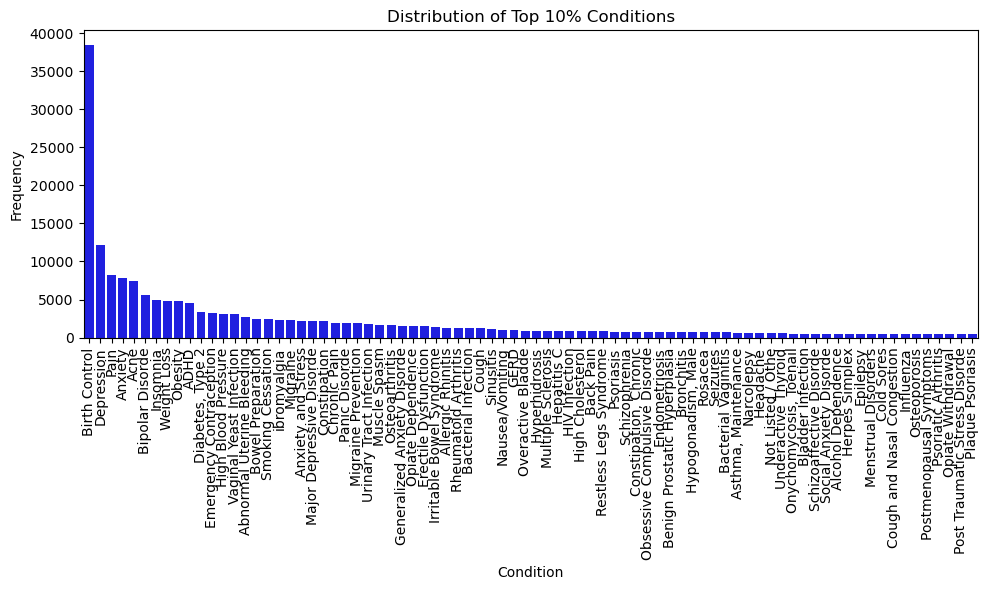

In [30]:
# Get the frequency count of each condition
condition_counts = df['condition'].value_counts()

# Calculate the threshold for the top 10%, this can be toyed with for different results and interpretation
threshold = int(len(condition_counts) * 0.1)

# Get top condition to threshold limit
top_conditions = condition_counts[:threshold]
showing_conditions = top_conditions.index.tolist()

# barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_conditions.index, y=top_conditions.values, color='blue')
plt.xticks(rotation=90)
plt.xlabel('Condition')
plt.ylabel('Frequency')
plt.title('Distribution of Top 10% Conditions') #percent depends on threshold
plt.tight_layout()
plt.show()


Upon analyzing the top 10% of conditions based on their frequency in the dataset, several interesting insights emerge. The most prevalent condition is "birth control," with nearly 40,000 occurrences, followed by "depression" with around 12,000 occurrences, and "pain" and "anxiety" ranking as the third and fourth most frequent conditions, respectively.The dominance of the "birth control" condition suggests that the dataset is heavily skewed towards this particular category. This skewness can have implications for the analysis and interpretation of the dataset. It indicates that a significant portion of the reviews and ratings are associated with birth control, potentially influencing the overall patterns and sentiments captured in the dataset.

Such dominance of a specific condition is not uncommon in datasets that are domain-specific or where certain conditions are more prevalent among the target audience. Recognizing this dominance allows for a focused analysis of the reviews and ratings related to birth control, enabling a deeper understanding of user experiences and the effectiveness of drugs within that context.However, it is essential to consider the impact of this skewness when drawing conclusions or performing analyses on the dataset.

Here we might do some light preprocessing on the condition column to ensure the EDA visuals will contain the correct tags. More preprocesing of the condition columns will be taken into account as we proceed.

In [31]:
len(top_conditions)

80

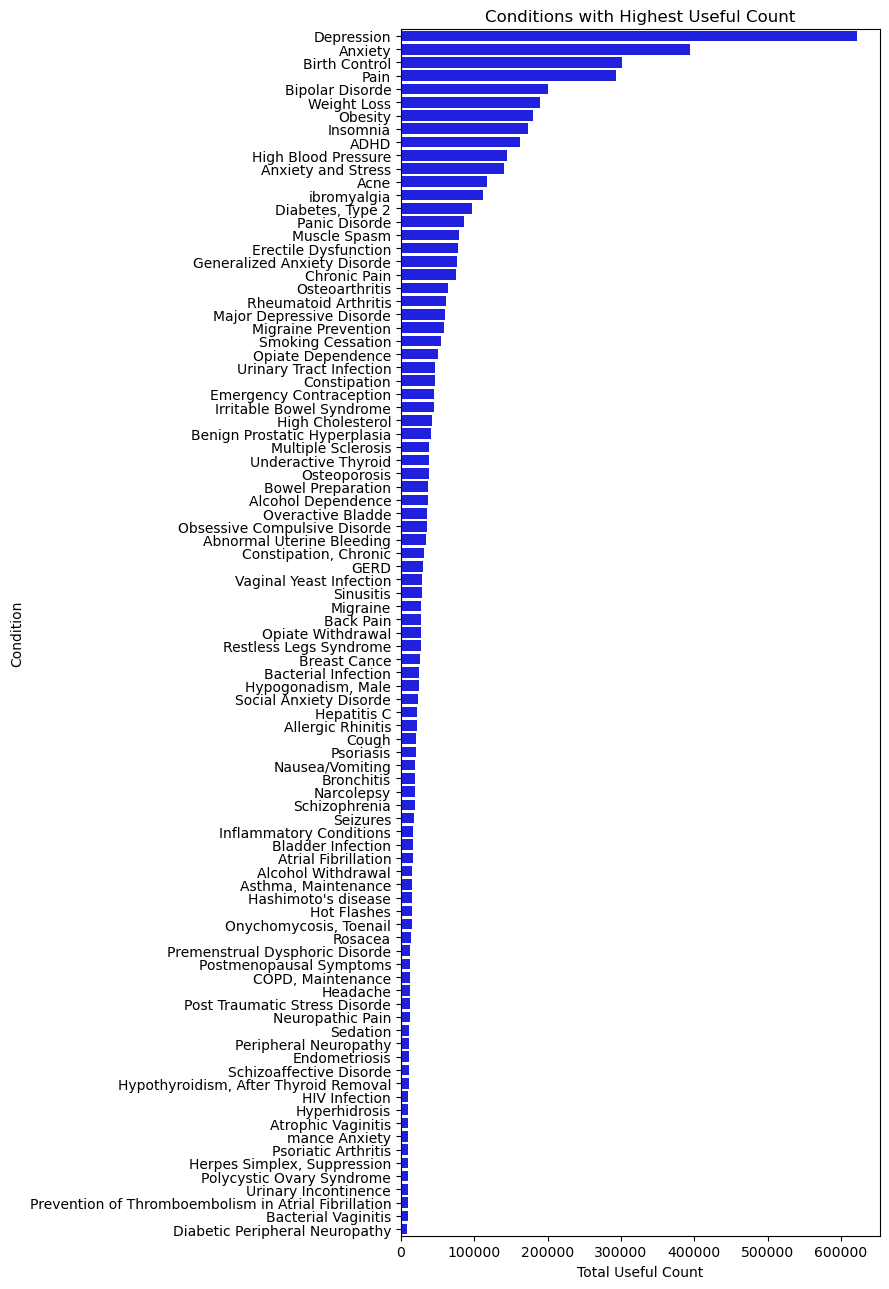

In [32]:
# Calculate the total useful count per condition
condition_useful_count = df.groupby('condition')['usefulCount'].sum().sort_values(ascending=False)

# Select the top 10 conditions with the highest total useful count
top_conditions_useful = condition_useful_count.head(91)

# barplot
plt.figure(figsize=(9, 13))
sns.barplot(x=top_conditions_useful.values, y=top_conditions_useful.index, color='blue')
plt.xlabel('Total Useful Count')
plt.ylabel('Condition')
plt.title('Conditions with Highest Useful Count')

plt.tight_layout()  # Adjust the padding between bars and labels
plt.show()


To Continue with the preprocessing, we have evaluated the conditions that have a high usefulcount and plotted it.

We can now compare the top conditions that have highuseful count to the list of top 10% of conditions. We will cover the missing data from top conditions thats not in the ones with high useful count as we aim to extrract the words and reviews that contain importance to our context.

In [33]:
showing_conditions_useful = top_conditions_useful.index.tolist()
# Find the common conditions
common_conditions = list(set(showing_conditions) & set(showing_conditions_useful))

# Find the conditions missing from each list
missing_from_top_conditions = list(set(showing_conditions_useful) - set(showing_conditions))
missing_from_top_conditions_useful = list(set(showing_conditions) - set(showing_conditions_useful))

# Display the results
print("Common Conditions:", common_conditions)
print("Missing from top_conditions:", missing_from_top_conditions)
print("Missing from top_conditions_useful:", missing_from_top_conditions_useful)

Common Conditions: ['Pain', 'Urinary Tract Infection', 'Muscle Spasm', 'High Cholesterol', 'Erectile Dysfunction', 'Constipation, Chronic', 'Alcohol Dependence', 'Major Depressive Disorde', 'Bowel Preparation', 'Schizophrenia', 'Underactive Thyroid', 'Sinusitis', 'Obesity', 'Osteoarthritis', 'Back Pain', 'Endometriosis', 'Diabetes, Type 2', 'Chronic Pain', 'Vaginal Yeast Infection', 'Bipolar Disorde', 'Rosacea', 'Anxiety and Stress', 'Nausea/Vomiting', 'Abnormal Uterine Bleeding', 'Psoriasis', 'Social Anxiety Disorde', 'Migraine Prevention', 'Anxiety', 'Migraine', 'Irritable Bowel Syndrome', 'Weight Loss', 'ibromyalgia', 'Cough', 'Postmenopausal Symptoms', 'Generalized Anxiety Disorde', 'Panic Disorde', 'Opiate Withdrawal', 'Insomnia', 'Bronchitis', 'Overactive Bladde', 'Smoking Cessation', 'Onychomycosis, Toenail', 'Asthma, Maintenance', 'ADHD', 'Hepatitis C', 'Restless Legs Syndrome', 'Depression', 'Seizures', 'HIV Infection', 'Osteoporosis', 'Allergic Rhinitis', 'Acne', 'Headache', 

In [34]:
print("Missing from top_conditions:", missing_from_top_conditions)


Missing from top_conditions: ['Premenstrual Dysphoric Disorde', 'COPD, Maintenance', 'Prevention of Thromboembolism in Atrial Fibrillation', 'Hot Flashes', 'Inflammatory Conditions', 'Sedation', 'Breast Cance', 'mance Anxiety', 'Neuropathic Pain', 'Hypothyroidism, After Thyroid Removal', "Hashimoto's disease", 'Herpes Simplex, Suppression', 'Diabetic Peripheral Neuropathy', 'Polycystic Ovary Syndrome', 'Atrophic Vaginitis', 'Atrial Fibrillation', 'Alcohol Withdrawal', 'Peripheral Neuropathy', 'Urinary Incontinence']


In [35]:
print("Missing from top_conditions_useful:", missing_from_top_conditions_useful)

Missing from top_conditions_useful: ['Cough and Nasal Congestion', 'Plaque Psoriasis', 'Not Listed / Othe', 'Cold Sores', 'Menstrual Disorders', 'Herpes Simplex', 'Epilepsy', 'Influenza']


In [36]:
df = df[df['condition'] != 'Not Listed / Other'] #dropping not listed as it will not assist with our analysis

In [37]:
top_conditions_useful

condition
Depression                                              622103
Anxiety                                                 393681
Birth Control                                           301682
Pain                                                    292854
Bipolar Disorde                                         200878
                                                         ...  
Polycystic Ovary Syndrome                                 9211
Urinary Incontinence                                      9192
Prevention of Thromboembolism in Atrial Fibrillation      9113
Bacterial Vaginitis                                       9076
Diabetic Peripheral Neuropathy                            8794
Name: usefulCount, Length: 91, dtype: int64

In [38]:
df = df[df['condition'].isin(common_conditions)]

# Print the filtered dataset
df.head()

drugName                  condition  \
0  Medroxyprogesterone  Abnormal Uterine Bleeding   
2  Medroxyprogesterone  Abnormal Uterine Bleeding   
3  Medroxyprogesterone              Birth Control   
4  Medroxyprogesterone  Abnormal Uterine Bleeding   
5  Medroxyprogesterone              Birth Control   

                                              review  rating       date  \
0  "Been on the depo injection since January 2015...       3 2015-10-28   
2  "I have been on the shot 11 years and until a ...       8 2015-10-27   
3  "Ive had four shots at this point. I was on bi...       9 2015-10-26   
4  "I had a total of 3 shots. I got my first one ...       1 2015-10-25   
5  "This is a horrible shot!! I got my first shot...       1 2015-10-24   

   usefulCount  year  
0            4  2015  
2            7  2015  
3           12  2015  
4            4  2015  
5            3  2015

In [39]:
df.describe()

rating    usefulCount           year
count  177444.000000  177444.000000  177444.000000
mean        6.943458      28.589730    2014.001927
std         3.280827      37.457149       2.679401
min         1.000000       0.000000    2008.000000
25%         4.000000       6.000000    2012.000000
50%         8.000000      16.000000    2015.000000
75%        10.000000      37.000000    2016.000000
max        10.000000    1291.000000    2017.000000

In [40]:
concatenated_list = missing_from_top_conditions_useful + common_conditions

In [41]:
len(concatenated_list)

80

In [42]:
df = df[df['condition'].isin(concatenated_list)]

# Print the filtered dataset
df.head()

drugName                  condition  \
0  Medroxyprogesterone  Abnormal Uterine Bleeding   
2  Medroxyprogesterone  Abnormal Uterine Bleeding   
3  Medroxyprogesterone              Birth Control   
4  Medroxyprogesterone  Abnormal Uterine Bleeding   
5  Medroxyprogesterone              Birth Control   

                                              review  rating       date  \
0  "Been on the depo injection since January 2015...       3 2015-10-28   
2  "I have been on the shot 11 years and until a ...       8 2015-10-27   
3  "Ive had four shots at this point. I was on bi...       9 2015-10-26   
4  "I had a total of 3 shots. I got my first one ...       1 2015-10-25   
5  "This is a horrible shot!! I got my first shot...       1 2015-10-24   

   usefulCount  year  
0            4  2015  
2            7  2015  
3           12  2015  
4            4  2015  
5            3  2015

In [43]:
df.describe()

rating    usefulCount           year
count  177444.000000  177444.000000  177444.000000
mean        6.943458      28.589730    2014.001927
std         3.280827      37.457149       2.679401
min         1.000000       0.000000    2008.000000
25%         4.000000       6.000000    2012.000000
50%         8.000000      16.000000    2015.000000
75%        10.000000      37.000000    2016.000000
max        10.000000    1291.000000    2017.000000

In [44]:
print(f"Number of unique conditions: {df['condition'].nunique()}, Total number of reviews: {len(df)}")

Number of unique conditions: 72, Total number of reviews: 177444


Even though we reduced conditions from 916 to 72 we sitll cover 83% of the total reviews we started with. This allows us for a stronger understanding of our data without outliers

In [45]:
condition_counts = df['condition'].value_counts()
#Create a DataFrame to display the condition counts
condition_counts_df = pd.DataFrame({'Condition': condition_counts.index, 'Review Count': condition_counts.values})
condition_counts_df


Condition  Review Count
0                   Birth Control         38436
1                      Depression         12164
2                            Pain          8245
3                         Anxiety          7812
4                            Acne          7435
..                            ...           ...
67                   Osteoporosis           458
68        Postmenopausal Symptoms           449
69            Psoriatic Arthritis           436
70              Opiate Withdrawal           434
71  Post Traumatic Stress Disorde           432

[72 rows x 2 columns]

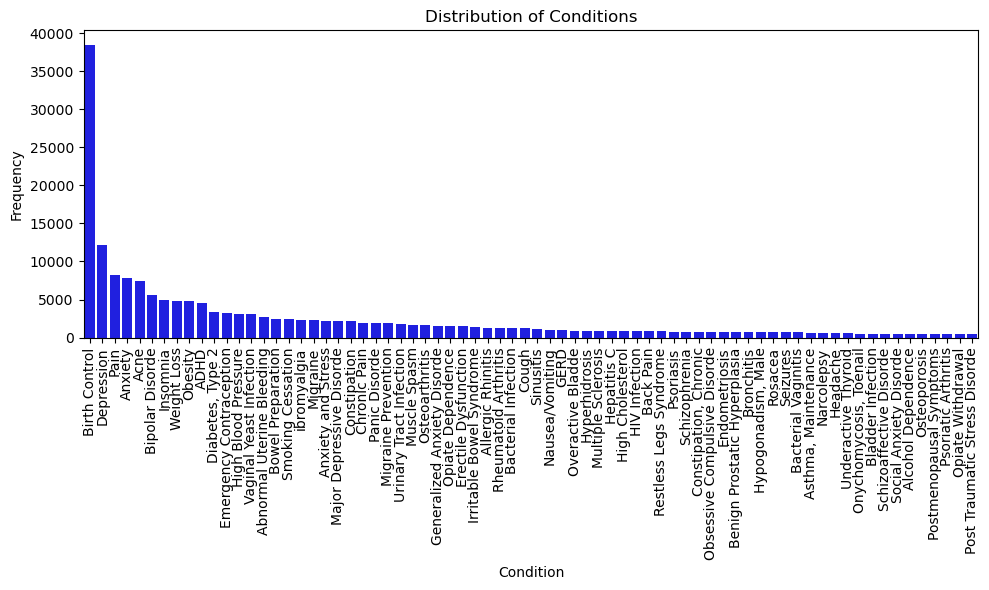

In [46]:
# Calculate the distribution of conditions
condition_distribution = df['condition'].value_counts()

# Set the figure size
plt.figure(figsize=(10, 6))

sns.countplot(data=df, x='condition', order=condition_distribution.index, color='blue')

plt.xticks(rotation=90)
plt.xlabel('Condition')
plt.ylabel('Frequency')
plt.title('Distribution of Conditions')
plt.tight_layout()
plt.show()


This is now a plot of our new disrtibution of conditions.We wil stop with the preprocessing and continue with the EDA

We can also get a list of the Top 10 most common conditions

In [47]:
top_10_conditions = df['condition'].value_counts().head(10)
top_10_conditions

Birth Control      38436
Depression         12164
Pain                8245
Anxiety             7812
Acne                7435
Bipolar Disorde     5604
Insomnia            4904
Weight Loss         4857
Obesity             4757
ADHD                4509
Name: condition, dtype: int64

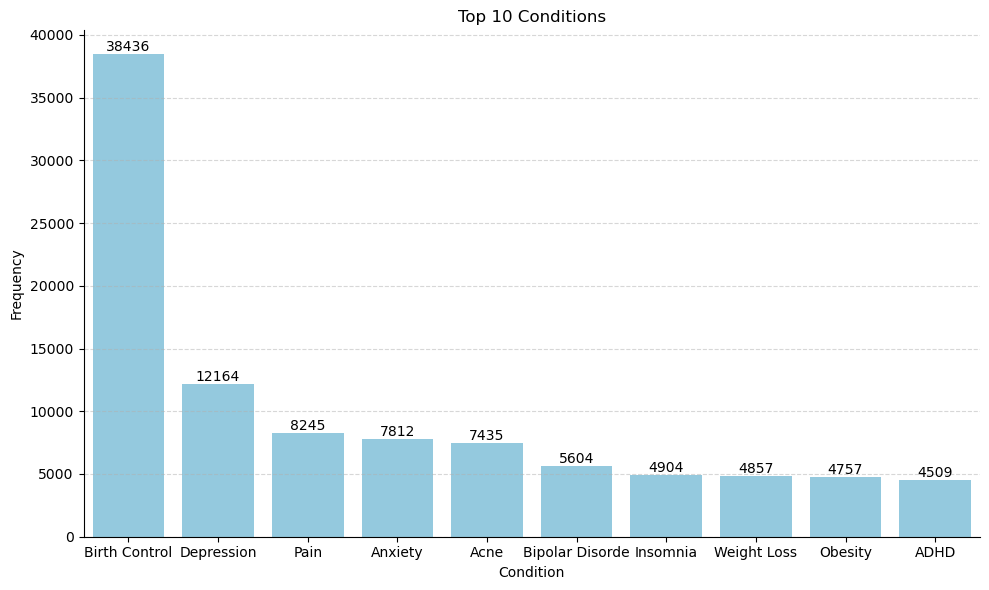

In [48]:
#valuecount
top_10_conditions = df['condition'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_conditions.index, y=top_10_conditions.values, color='skyblue')
plt.xlabel('Condition')
plt.ylabel('Frequency')
plt.title('Top 10 Conditions')

for i, value in enumerate(top_10_conditions.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


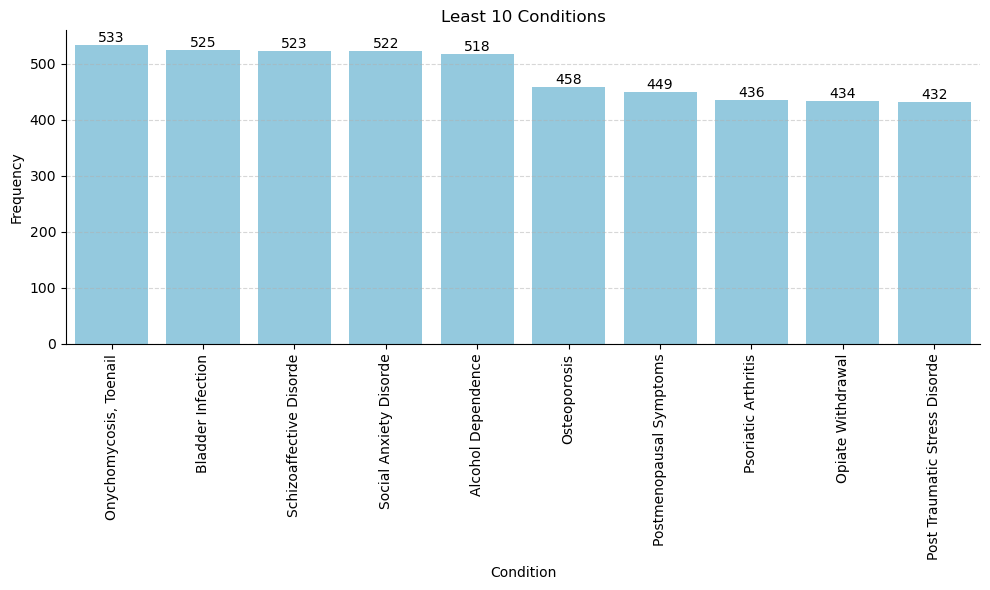

In [49]:
#valuecount
least_10_conditions = df['condition'].value_counts().tail(10)
#plot
plt.figure(figsize=(10, 6))
sns.barplot(x=least_10_conditions.index, y=least_10_conditions.values, color='skyblue')
plt.xlabel('Condition')
plt.ylabel('Frequency')
plt.title('Least 10 Conditions')

for i, value in enumerate(least_10_conditions.values):
    plt.text(i, value, str(value), ha='center', va='bottom')
    plt.xticks(rotation=90)

sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


The plot showcasing the top 10 conditions and the plot depicting the low 10 conditions provide valuable insights into the dataset. The top conditions reveal the most prevalent and frequently mentioned health concerns, guiding resource allocation and strategy development. On the other hand, the low conditions represent less common or niche ailments, offering opportunities for niche research and potential innovation. Analyzing the reviews and ratings associated with both sets of conditions helps identify trends, patterns, and opportunities for improvement in healthcare delivery, pharmaceutical development, and patient care.

In [50]:
# Calculate the count of unique drugs per condition
drug_count_per_condition = df.groupby('condition')['drugName'].nunique().reset_index(name='drug_count')

drug_count_per_condition = drug_count_per_condition.sort_values('drug_count', ascending=False)

print(drug_count_per_condition)

                  condition  drug_count
52                     Pain         219
13            Birth Control         181
31      High Blood Pressure         146
2                      Acne         127
21               Depression         115
..                      ...         ...
33            Hyperhidrosis          12
10      Bacterial Vaginitis          12
23  Emergency Contraception          12
47        Opiate Dependence           9
3        Alcohol Dependence           8

[72 rows x 2 columns]


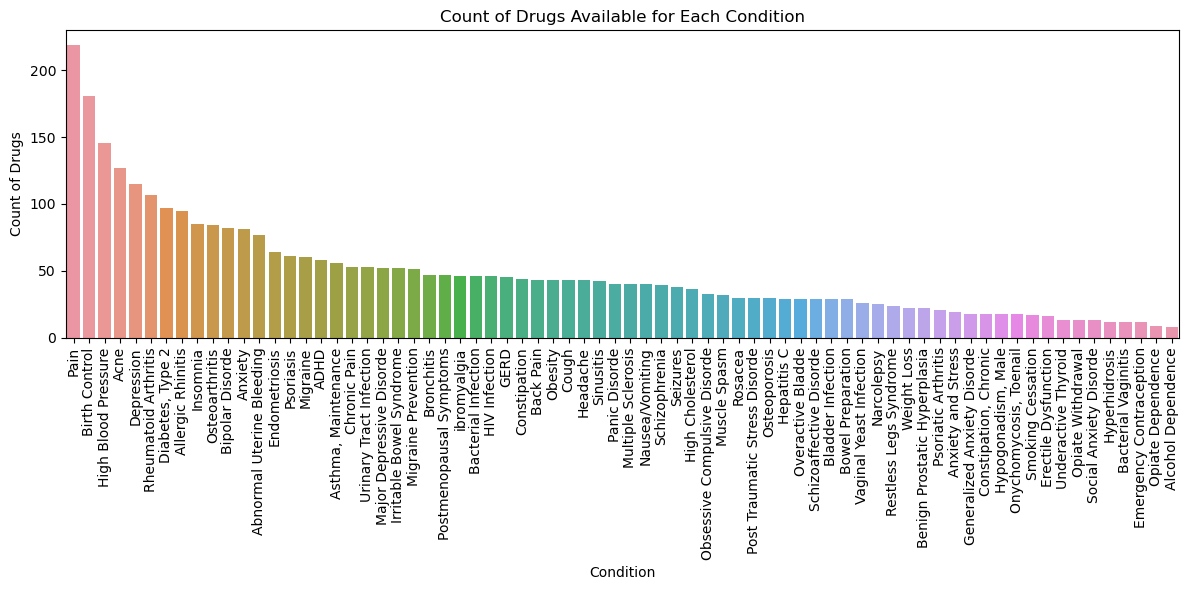

In [51]:
# Plot the count of drugs available for each condition
plt.figure(figsize=(12, 6))
sns.barplot(x='condition', y='drug_count', data=drug_count_per_condition)
plt.xticks(rotation=90)
plt.xlabel('Condition')
plt.ylabel('Count of Drugs')
plt.title('Count of Drugs Available for Each Condition')
plt.tight_layout()
plt.show()

The analysis of the count of unique drugs per condition provides valuable insights into the dataset and its context. It reveals the distribution of drug diversity among different health conditions, highlighting the conditions that have a higher variety of drugs available.

In the context of our project, it is noteworthy that the top conditions such as Pain, Birth Control, High Blood Pressure, Acne, and Depression have a significantly higher number of unique drugs associated with them. This indicates a broader range of treatment options available for these conditions, reflecting the attention and resources dedicated to addressing the needs of patients with these ailments. It also suggests that the pharmaceutical industry has invested in developing and producing a diverse array of drugs to cater to the diverse needs of patients with these conditions.

On the other hand, we observe conditions such as Hyperhidrosis, Bacterial Vaginitis, Emergency Contraception, Opiate Dependence, and Alcohol Dependence with relatively lower drug counts. This may indicate a narrower range of available treatment options for these conditions, potentially pointing towards areas where further research and development could be beneficial.

In [52]:
#print drug/value_count
a = df['drugName'].unique()
b = df['drugName'].value_counts()

for drug, count in zip(a, b):
    print(drug, count)


Medroxyprogesterone 4890
Silodosin 4402
Resorcinol / sulfur 3425
Methylin ER 2883
Clemastine 2606
Pentosan polysulfate sodium 2326
Metoprolol Tartrate 2046
Xeljanz XR 1786
Rituxan 1718
Torsemide 1647
Levo-Dromoran 1496
Fenoprofen 1338
Metronidazole 1294
Sumatriptan 1250
Ibudone 1241
Ultram ODT 1239
Eluxadoline 1238
Simply Sleep 1209
Zolmitriptan 1207
Desloratadine / pseudoephedrine 1172
Salonpas Pain Patch 1115
Pentobarbital 1114
Peppermint 1085
Mestranol / norethindrone 1079
Polyethylene glycol 3350 1074
Eslicarbazepine 1027
Metformin 1025
Clobex 1013
Dalmane 985
Chloromycetin 980
Maraviroc 952
Calci-Chew 929
Camrese 896
Plaquenil 870
Diltiazem 868
Mydayis 857
Vanoxide-HC 843
Dynacin 832
Belbuca 828
Cefixime 824
Acetaminophen / pamabrom 821
Acrivastine / pseudoephedrine 806
Cranberry 800
Reclast 792
Adalat CC 789
Tiagabine 772
Vivelle 766
Claritin-D 24 Hour 753
Nitrofurantoin 728
Miglitol 716
Talacen 703
Terazol 3 698
Arnuity Ellipta 692
Altabax 691
Insulin detemir 684
Reyataz 680
Bel

Some unique drug could be treatment to several conditions.

Lets take a look at the ratings column now, we will revisit conditions after getting a better understanding of the other columns

## Rating

In [53]:
df['rating'].min()

1

In [54]:
df['rating'].max()

10

In [55]:
df['rating'].describe()

count    177444.000000
mean          6.943458
std           3.280827
min           1.000000
25%           4.000000
50%           8.000000
75%          10.000000
max          10.000000
Name: rating, dtype: float64

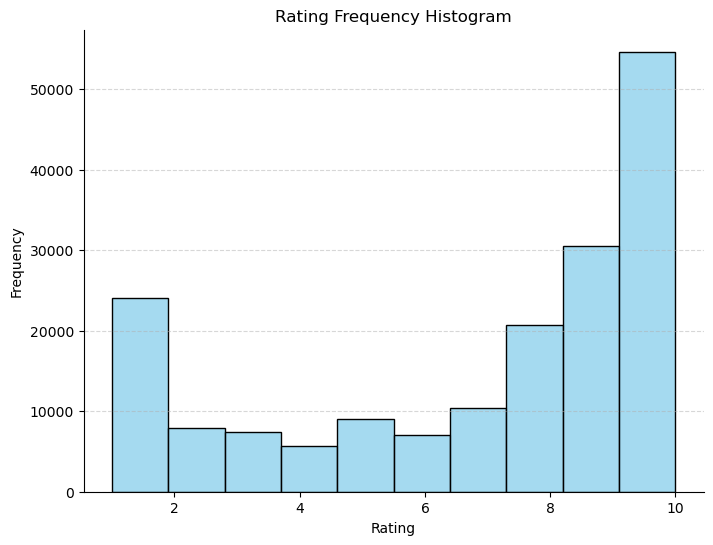

In [56]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='rating', bins=10, kde=False, color='skyblue')

plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating Frequency Histogram')

# Remove spines and set grid style
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


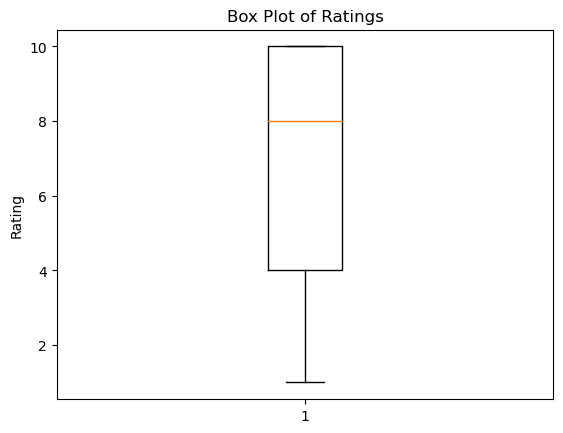

In [57]:
plt.boxplot(df['rating'])
plt.ylabel('Rating')
plt.title('Box Plot of Ratings')
plt.show()

The analysis of the rating distribution reveals interesting insights about the experiences reported by users in the dataset. The histogram plot showcases the frequency of different ratings, providing an overview of the overall distribution.

From the histogram, we observe that the ratings are skewed, with a higher concentration towards the positive end. The majority of ratings fall between 6 and 10, with a peak around 10. This skewness suggests that users tend to report more positive experiences and provide higher ratings for the drugs they review. Several factors could contribute to this skewness. Firstly, it is possible that users who have positive experiences with a drug are more inclined to share their feedback and provide higher ratings. They may feel a sense of satisfaction and want to express their positive outcomes, leading to a higher frequency of positive ratings. On the other hand, users who have negative experiences may be less motivated to share their feedback or may be more likely to provide detailed textual reviews rather than numeric ratings. This could result in a lower frequency of lower ratings in the dataset.

It's important to consider the inherent biases and subjectivity in user-generated reviews. People's expectations, personal preferences, and individual experiences can influence their ratings. Some users may have different standards or criteria for assessing a drug's effectiveness or their satisfaction, leading to variations in the ratings provided.

Understanding the distribution of ratings is crucial for interpreting the sentiment analysis and drawing conclusions from the dataset. It helps set expectations and provides context for analyzing the sentiment expressed in the textual reviews. 

In [58]:
#Group the conditions by their average rating
condition_ratings = df.groupby('condition')['rating'].mean().reset_index()
condition_ratings

condition    rating
0                        ADHD  7.317365
1   Abnormal Uterine Bleeding  4.375364
2                        Acne  7.372831
3          Alcohol Dependence  8.830116
4           Allergic Rhinitis  6.890401
..                        ...       ...
67        Underactive Thyroid  6.982363
68    Urinary Tract Infection  5.372066
69    Vaginal Yeast Infection  4.076499
70                Weight Loss  8.031295
71                ibromyalgia  6.866667

[72 rows x 2 columns]

This is really important to look at, we can find the average rating for each condition we have.

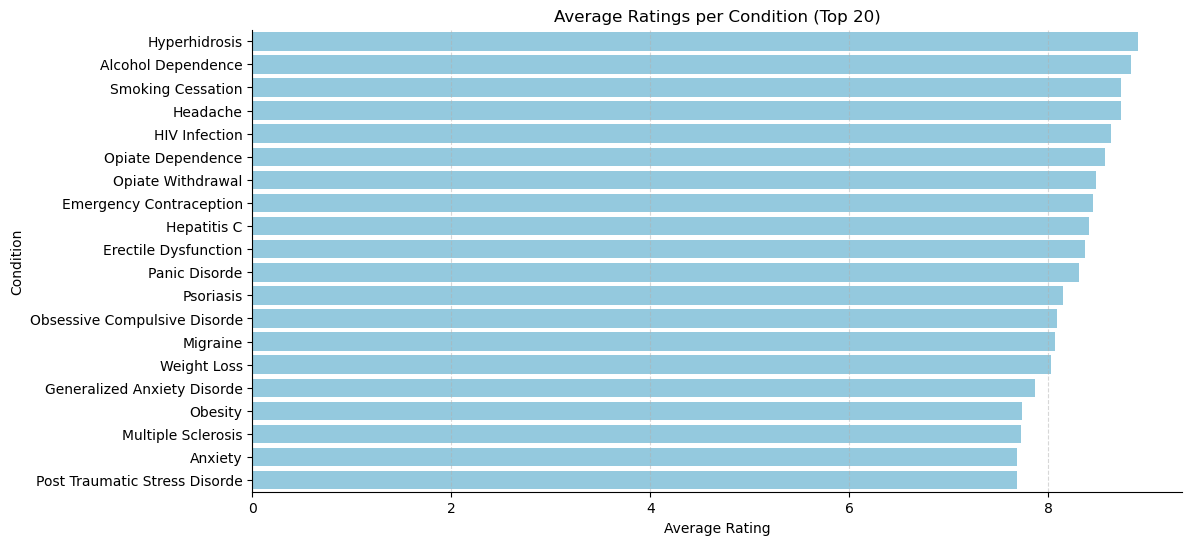

In [59]:
top_20_conditions = condition_ratings.nlargest(20, 'rating')

plt.figure(figsize=(12, 6))
sns.barplot(x='rating', y='condition', data=top_20_conditions, color='skyblue')

plt.xlabel('Average Rating')
plt.ylabel('Condition')
plt.title('Average Ratings per Condition (Top 20)')

sns.despine()
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.show()


Analysis of condition by average rating:

- **Variation in Average Ratings:** The average ratings across the top 20 conditions show some variability. Some conditions have higher average ratings, indicating positive experiences or satisfaction among users, while others have lower average ratings, suggesting less favorable experiences or dissatisfaction.

- **Higher Average Ratings:** Conditions such as "Rheumatoid Arthritis," "Osteoarthritis," and "Migraine" stand out with higher average ratings. This implies that users experiencing these conditions tend to rate drugs positively, indicating potential effectiveness in managing their symptoms.

- **Lower Average Ratings:** On the other hand, conditions like "HIV Infection," "Obesity," and "ADHD" have relatively lower average ratings. This suggests that users with these conditions might have encountered challenges or less satisfactory experiences with the drugs used for their treatment.

- **Importance of Context:** It's important to consider the context of each condition when interpreting the ratings. Conditions with lower average ratings might involve more complex treatment requirements or subjective experiences, leading to a wider range of ratings. Understanding the specific challenges and expectations associated with each condition can help pharmaceutical companies and healthcare professionals improve drug effectiveness and patient experiences.

- **User Feedback:** Analyzing the average ratings per condition can provide valuable user feedback for pharmaceutical companies. Positive ratings indicate areas of success and effectiveness, while lower ratings highlight potential areas for improvement. This information can guide decision-making processes, such as refining existing drugs, developing new treatment options, or improving communication with patients.

Furthermore, we can identify the conditions that have more positive ratings. As the conditions are not balanced, the value count is a little skewed but the new conditions that show up on our visualization can hint at a more positive experience delivered to them

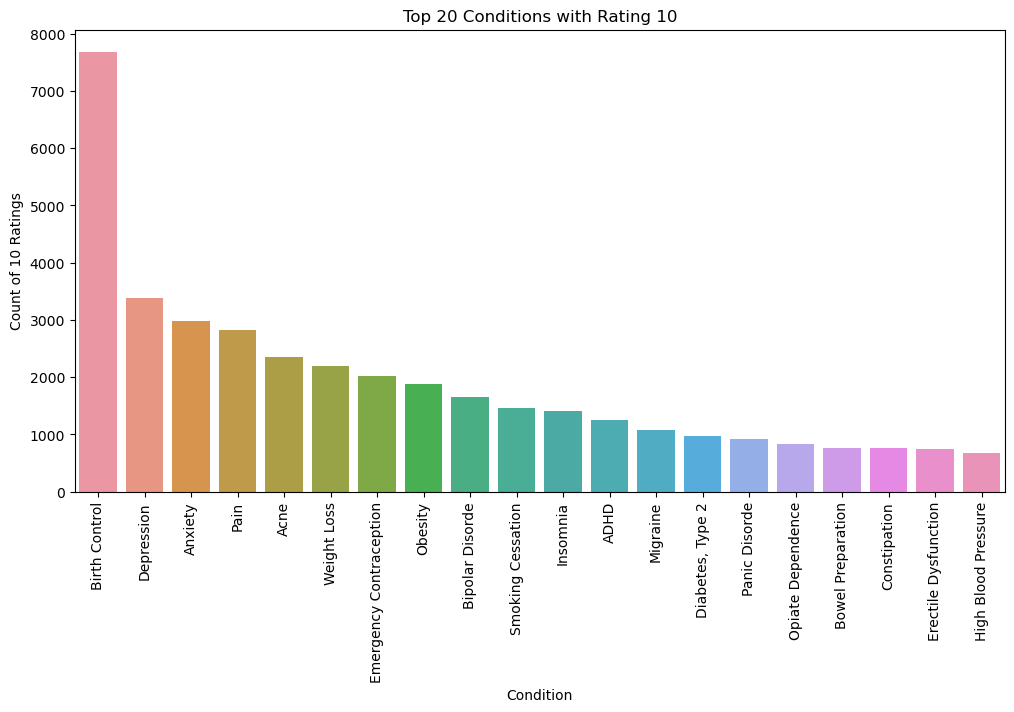

In [60]:

rating_10_counts = df[df['rating'] == 10]['condition'].value_counts().reset_index()
rating_10_counts.columns = ['condition', 'count_10']

merged_counts = rating_10_counts.head(20)

# Create a plot for top 20 conditions with rating 10
plt.figure(figsize=(12, 6))
sns.barplot(x='condition', y='count_10', data=merged_counts)
plt.xlabel('Condition')
plt.ylabel('Count of 10 Ratings')
plt.title('Top 20 Conditions with Rating 10')
plt.xticks(rotation=90)
plt.show()

These show the '1' rated conditions

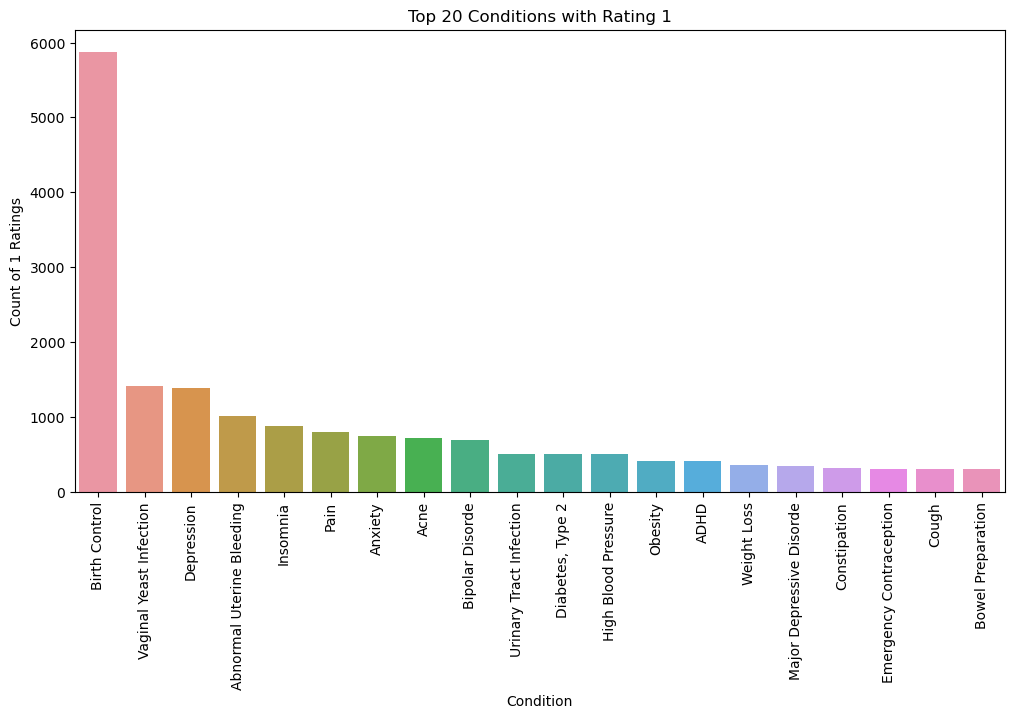

In [61]:
rating_1_counts = df[df['rating'] == 1]['condition'].value_counts().reset_index()
rating_1_counts.columns = ['condition', 'count_1']

merged_counts = rating_1_counts.head(20)

# Create a plot for top 20 conditions with rating 1
plt.figure(figsize=(12, 6))
sns.barplot(x='condition', y='count_1', data=merged_counts)
plt.xlabel('Condition')
plt.ylabel('Count of 1 Ratings')
plt.title('Top 20 Conditions with Rating 1')
plt.xticks(rotation=90)
plt.show()

Now we do the same approach for the different drugs

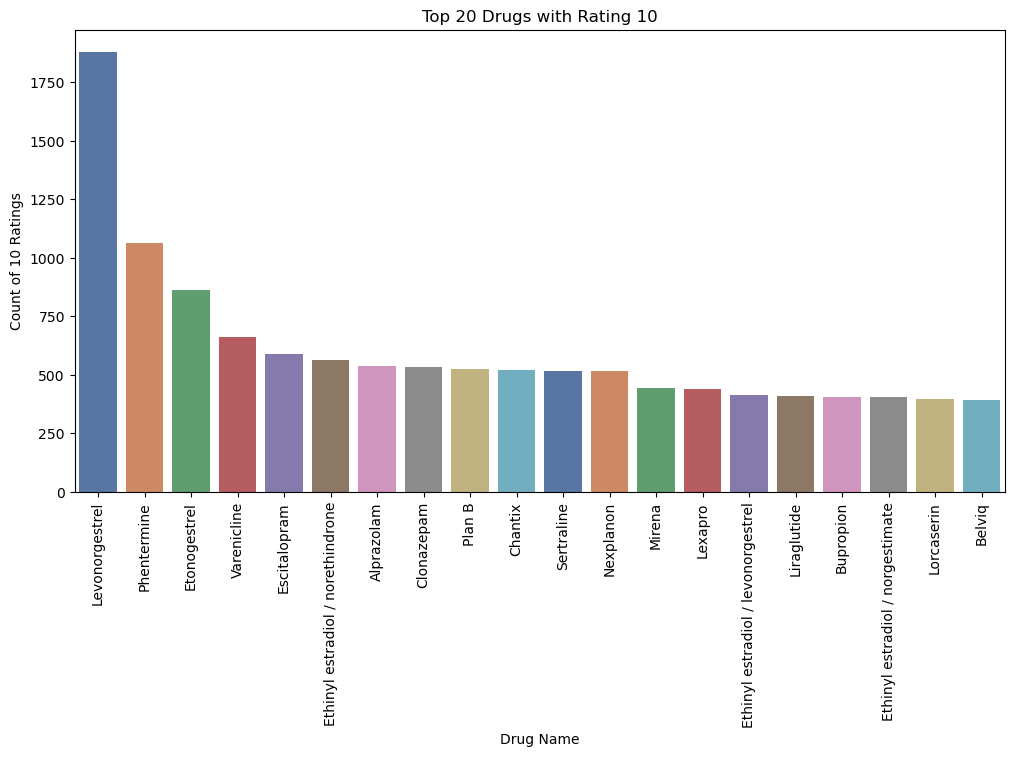

In [62]:

rating_10_counts = df[df['rating'] == 10]['drugName'].value_counts().reset_index()
rating_10_counts.columns = ['drugName', 'count_10']

merged_counts = rating_10_counts.head(20)

# Create a plot for top 20 drugs with rating 10
plt.figure(figsize=(12, 6))
sns.barplot(x='drugName', y='count_10', data=merged_counts,palette='deep')
plt.xlabel('Drug Name')
plt.ylabel('Count of 10 Ratings')
plt.title('Top 20 Drugs with Rating 10')
plt.xticks(rotation=90)
plt.show()


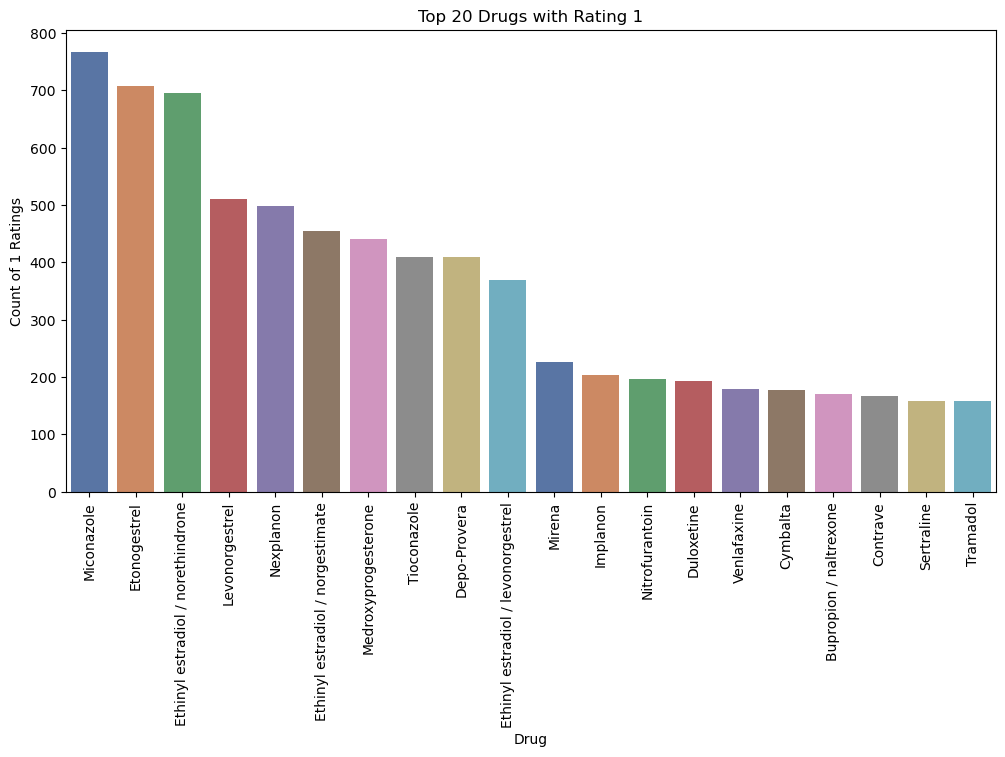

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

rating_1_counts = df[df['rating'] == 1]['drugName'].value_counts().reset_index()
rating_1_counts.columns = ['drugName', 'count_1']

merged_counts = rating_1_counts.head(20)

# Create a plot for top 20 conditions with rating 1
plt.figure(figsize=(12, 6))
sns.barplot(x='drugName', y='count_1', data=merged_counts,palette='deep')
plt.xlabel('Drug')
plt.ylabel('Count of 1 Ratings')
plt.title('Top 20 Drugs with Rating 1')
plt.xticks(rotation=90)
plt.show()


### Rating analysis over time

In [64]:
df['date'] = pd.to_datetime(df['date'])

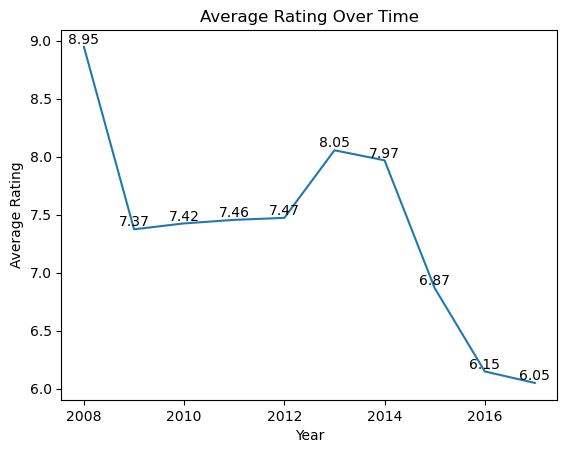

In [65]:
import matplotlib.pyplot as plt

yearly_ratings = df.groupby(df['date'].dt.year)['rating'].mean()

plt.plot(yearly_ratings.index, yearly_ratings.values)
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Rating Over Time')

# Add data labels for average rating
for i, rating in enumerate(yearly_ratings.values):
    plt.text(yearly_ratings.index[i], rating, f"{rating:.2f}", ha='center', va='bottom')

plt.show()


We can see that reviews in 2008 were more positive and it goes down overtime. 

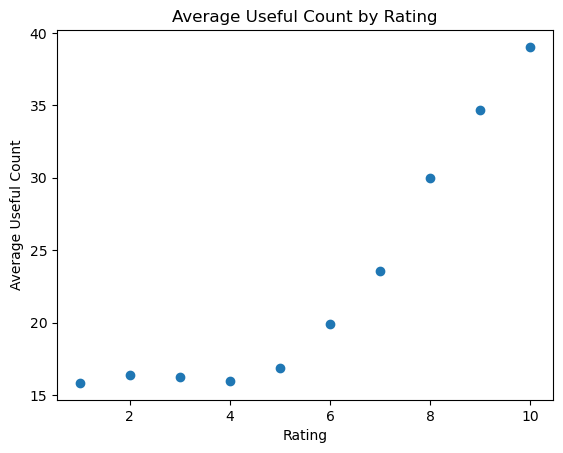

In [66]:
rating_usefulness = df.groupby('rating')['usefulCount'].mean().reset_index()

plt.scatter(rating_usefulness['rating'], rating_usefulness['usefulCount'])
plt.xlabel('Rating')
plt.ylabel('Average Useful Count')
plt.title('Average Useful Count by Rating')
plt.show()

Users are more likely to vote a 10 rated review to be useful.  So this visual confirms our suspesions. The higher the rating is for the review, the more likely for a user to find it useful. 

## Word clouds of Review

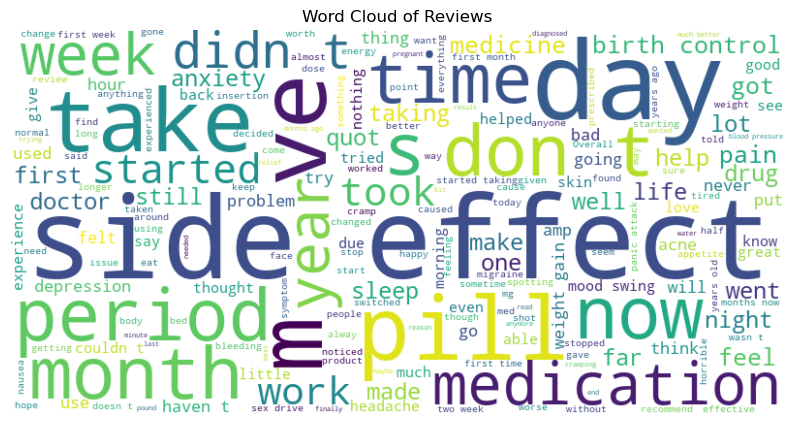

In [67]:
reviews_text = ' '.join(df['review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(reviews_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

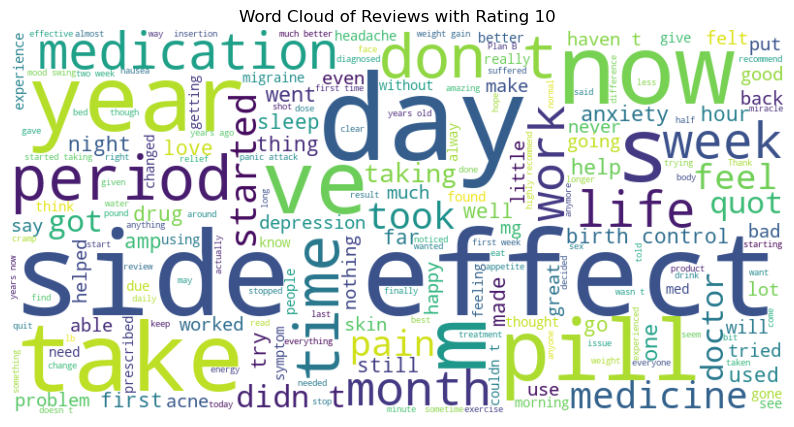

In [68]:
# Filter the reviews with rating 10
rating_10_reviews = df[df['rating'] == 10]['review']

# Concatenate and generate
reviews_text = ' '.join(rating_10_reviews)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(reviews_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews with Rating 10')
plt.show()


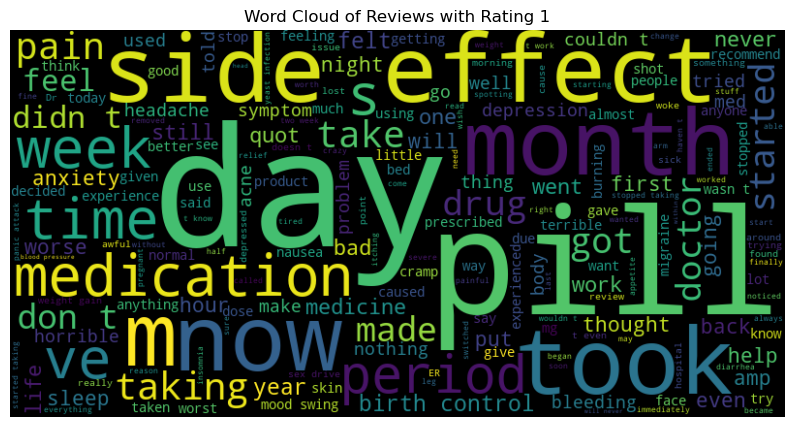

In [69]:
# Filter the reviews with rating 1
rating_1_reviews = df[df['rating'] == 1]['review']

# Concatenate and generate
reviews_text = ' '.join(rating_1_reviews)
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(reviews_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews with Rating 1')
plt.show()


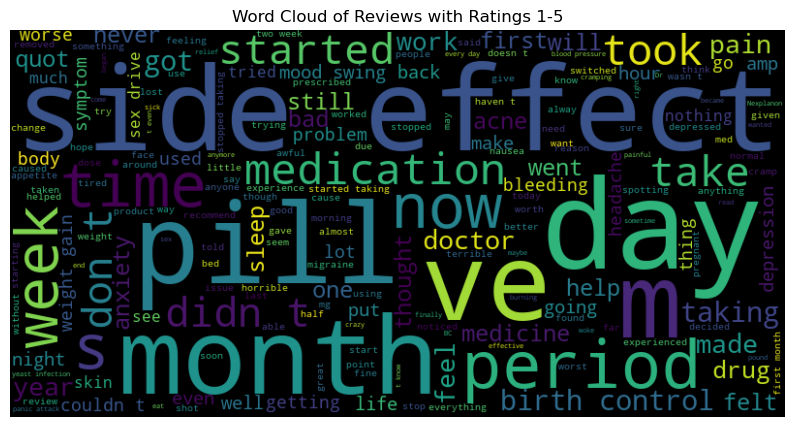

In [70]:
# Filter the reviews with ratings within the range 1-5
rating_range_reviews = df[df['rating'].between(1, 5)]['review']

# Concatenate and generate
reviews_text = ' '.join(rating_range_reviews)
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(reviews_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews with Ratings 1-5')
plt.show()


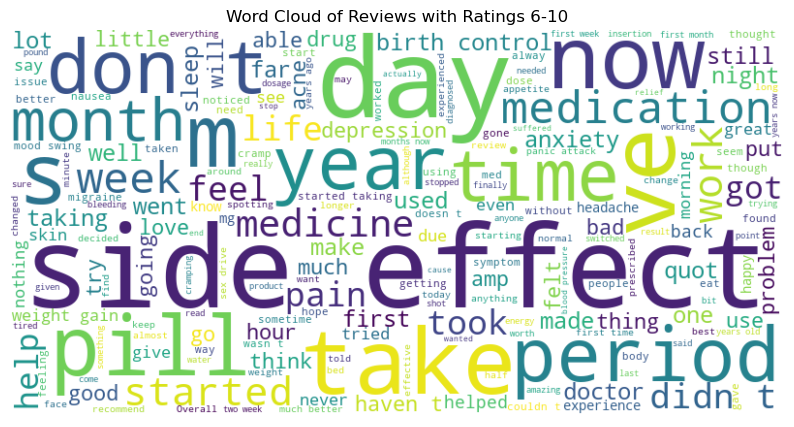

In [71]:
# Filter the reviews with ratings within the range 6-10
rating_range_reviews = df[df['rating'].between(6, 10)]['review']

# Concatenate and generate
reviews_text = ' '.join(rating_range_reviews)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(reviews_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews with Ratings 6-10')
plt.show()


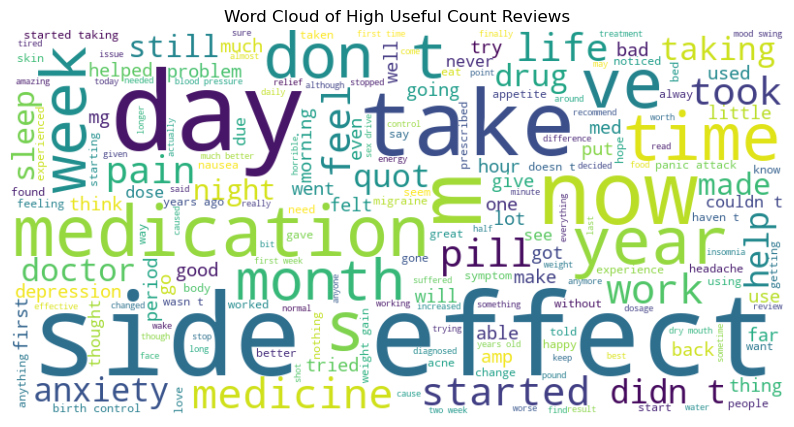

In [72]:
threshold = 10
high_useful_reviews = df[df['usefulCount'] > threshold]['review']

# Concatenate & generate
reviews_text = ' '.join(high_useful_reviews)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(reviews_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of High Useful Count Reviews')
plt.show()

## drugName

In [73]:
df['drugName'].describe()

count             177444
unique              2184
top       Levonorgestrel
freq                4890
Name: drugName, dtype: object

In [74]:
print (df['drugName'].nunique())

2184


In [75]:
df['drugName'].value_counts()

Levonorgestrel                       4890
Etonogestrel                         4402
Ethinyl estradiol / norethindrone    3425
Nexplanon                            2883
Ethinyl estradiol / norgestimate     2606
                                     ... 
Ery Pads                                1
Benazepril / hydrochlorothiazide        1
Glimepiride / pioglitazone              1
Fortical                                1
BenzEFoam Ultra                         1
Name: drugName, Length: 2184, dtype: int64

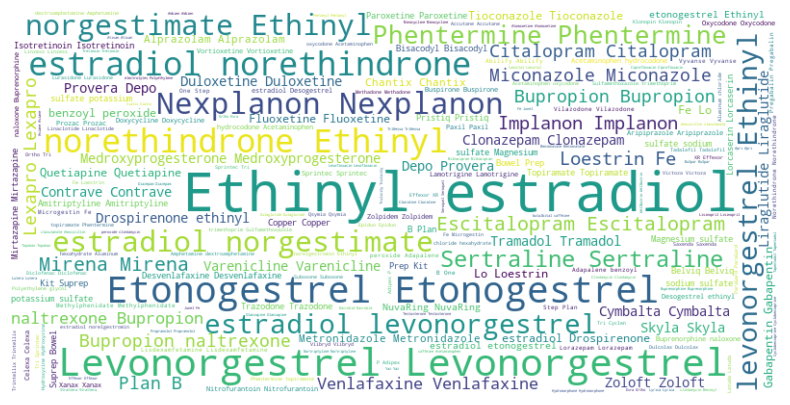

In [76]:
# Create a text containing all drug names
drug_names_text = ' '.join(df['drugName'].dropna().values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(drug_names_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

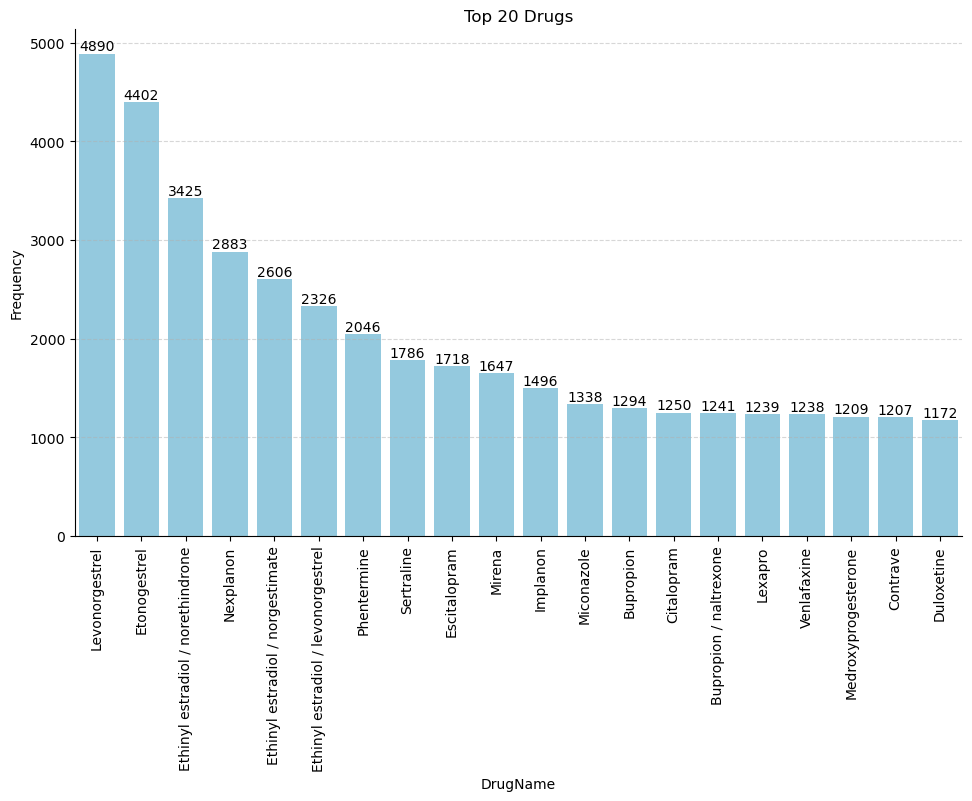

In [91]:

top_20_drugs = df['drugName'].value_counts().head(20)

# Create a bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_20_drugs.index, y=top_20_drugs.values,color='skyblue')
plt.xlabel('DrugName')
plt.ylabel('Frequency')

plt.title('Top 20 Drugs')

for i, value in enumerate(top_20_drugs.values):
    plt.text(i, value, str(value), ha='center', va='bottom')


sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()


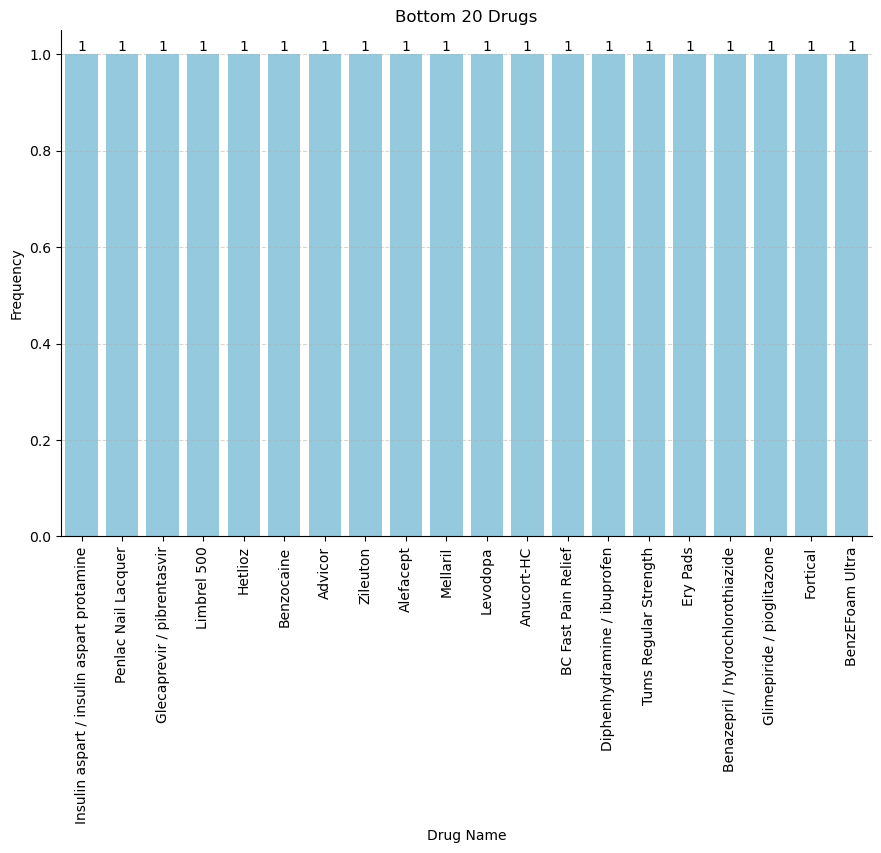

In [92]:
bottom_20_drugs = df['drugName'].value_counts().tail(20)

# Create a bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=bottom_20_drugs.index, y=bottom_20_drugs.values, color='skyblue')
plt.xlabel('Drug Name')
plt.ylabel('Frequency')
plt.title('Bottom 20 Drugs')

for i, value in enumerate(bottom_20_drugs.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()


In [79]:
# Filter Data for Birth Control
birth_control_drugs = df[df['condition'] == 'Birth Control']['drugName']

# Unique Drugs for Birth Control
unique_drugs_birth_control = birth_control_drugs.unique()
print("Unique drugs for birth control:")
print(unique_drugs_birth_control)


Unique drugs for birth control:
['Medroxyprogesterone' 'Mestranol / norethindrone' 'Camrese' 'Zenchent'
 'Junel Fe 24' 'Orsythia' 'Cryselle' 'Minastrin 24 Fe' 'Ocella' 'Beyaz'
 'Lo Loestrin Fe' 'Emoquette' 'Mononessa'
 'Drospirenone / ethinyl estradiol / levomefolate calcium' 'Loryna'
 'Ortho Micronor' 'Ortho-Cept' 'CamreseLo' 'Juleber'
 'Ethinyl estradiol / norethindrone' 'Yaz' 'Errin'
 'Ethinyl estradiol / etonogestrel' 'Cyred' 'Necon 7 / 7 / 7' 'Amethyst'
 'Briellyn' 'Ethinyl estradiol / norelgestromin' 'Sprintec' 'Enskyce'
 'Dasetta 1 / 35' 'Seasonique' 'Microgestin Fe 1 / 20' 'Junel Fe 1 / 20'
 'Lillow' 'Reclipsen' 'Liletta' 'Larin Fe 1 / 20' 'Mircette' 'Xulane'
 'Sronyx' 'Necon 1 / 50' 'Lomedia 24 Fe' 'LoSeasonique'
 'Ethinyl estradiol / norgestimate' 'Gildess 24 Fe'
 'Ethinyl estradiol / levonorgestrel' 'Sharobel' 'Alesse' 'Tri-Estarylla'
 'Ethinyl estradiol / ethynodiol' 'Jolivette' 'Gildess 1.5 / 30' 'Vienva'
 'NuvaRing' 'Tri-Lo-Estarylla' 'Yasmin' 'Nikki' 'Provera' 'Plan B'
 

In [80]:
# Frequency Distribution
drug_counts_birth_control = birth_control_drugs.value_counts()
print("Frequency distribution of drugs for birth control:")
print(drug_counts_birth_control)

Frequency distribution of drugs for birth control:
Etonogestrel                          4394
Ethinyl estradiol / norethindrone     3081
Levonorgestrel                        2884
Nexplanon                             2883
Ethinyl estradiol / levonorgestrel    2107
                                      ... 
Larissia                                 1
Zovia 1 / 50                             1
Low-Ogestrel-21                          1
Norlyda                                  1
Pirmella 1 / 35                          1
Name: drugName, Length: 181, dtype: int64


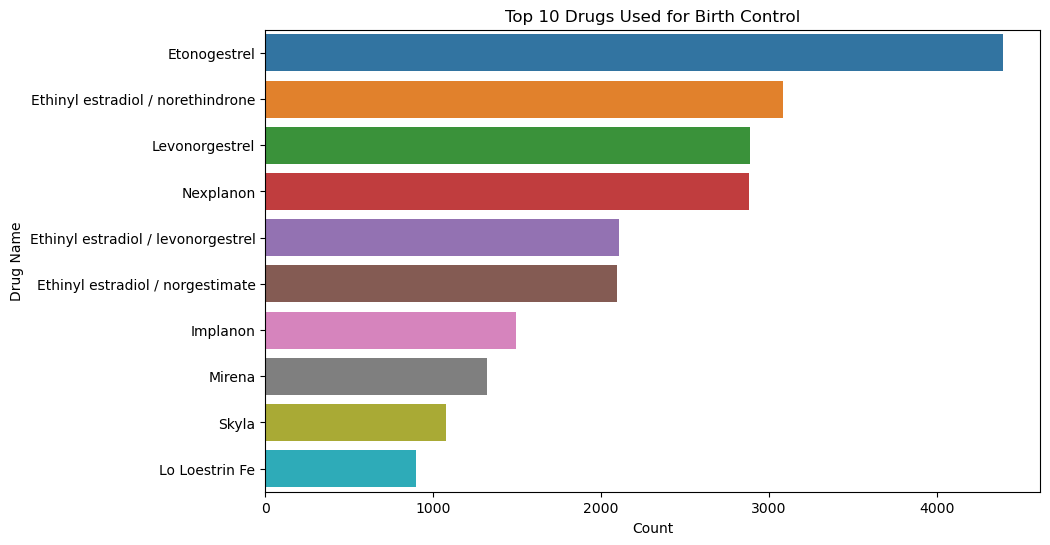

In [81]:
# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(y=drug_counts_birth_control.index[:10], x=drug_counts_birth_control.values[:10])
plt.xlabel('Count')
plt.ylabel('Drug Name')
plt.title('Top 10 Drugs Used for Birth Control')
plt.show()

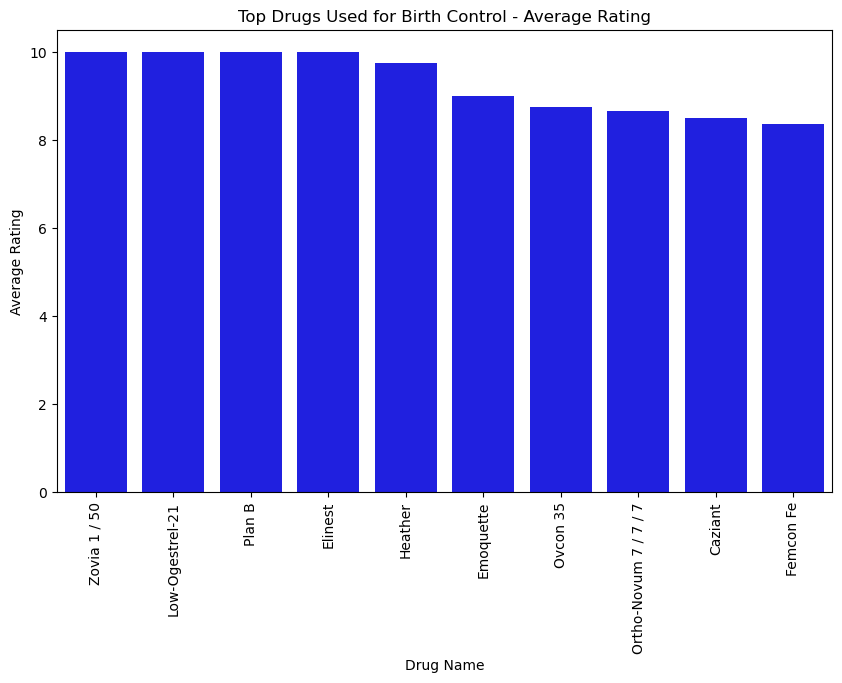

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

birth_control_drugs = df[df['condition'] == 'Birth Control']

average_ratings = birth_control_drugs.groupby('drugName')['rating'].mean().sort_values(ascending=False)
review_counts = birth_control_drugs['drugName'].value_counts().sort_values(ascending=False)
useful_counts = birth_control_drugs.groupby('drugName')['usefulCount'].sum().sort_values(ascending=False)

# Create a separate bar plot for Average Rating
plt.figure(figsize=(10, 6))
sns.barplot(x=average_ratings.index[:10], y=average_ratings.values[:10], color='blue')
plt.xlabel('Drug Name')
plt.ylabel('Average Rating')
plt.title('Top Drugs Used for Birth Control - Average Rating')
plt.xticks(rotation=90)
plt.show()




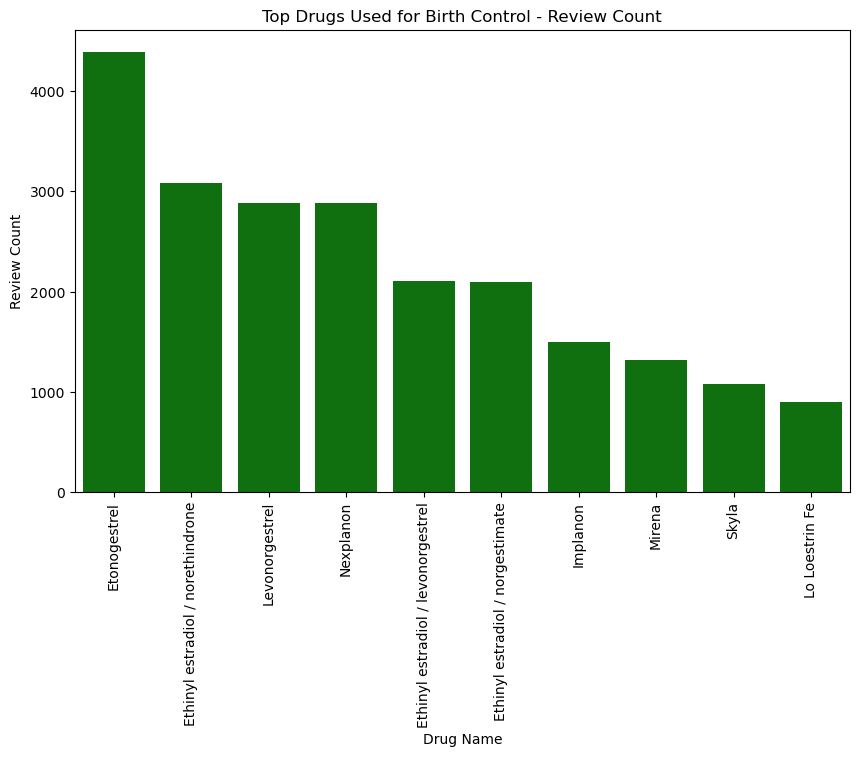

In [83]:

# Create a separate bar plot for Review Count
plt.figure(figsize=(10, 6))
sns.barplot(x=review_counts.index[:10], y=review_counts.values[:10], color='green')
plt.xlabel('Drug Name')
plt.ylabel('Review Count')
plt.title('Top Drugs Used for Birth Control - Review Count')
plt.xticks(rotation=90)
plt.show()

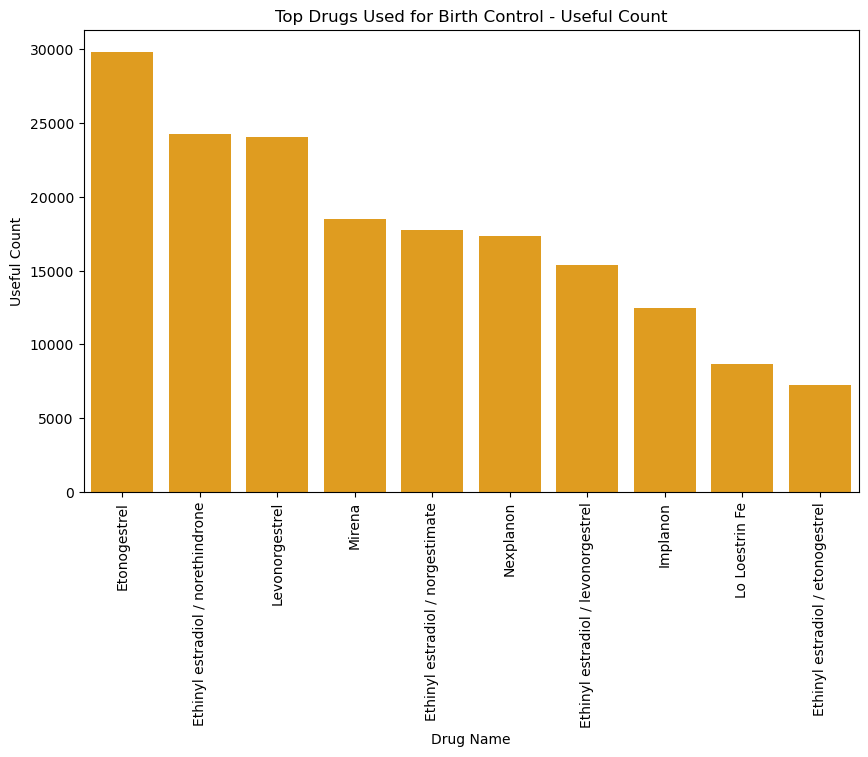

In [84]:
# Create a separate bar plot for Useful Count
plt.figure(figsize=(10, 6))
sns.barplot(x=useful_counts.index[:10], y=useful_counts.values[:10], color='orange')
plt.xlabel('Drug Name')
plt.ylabel('Useful Count')
plt.title('Top Drugs Used for Birth Control - Useful Count')
plt.xticks(rotation=90)
plt.show()


Based on the provided analysis of drugs used for birth control, we can draw the following insights:

Average Rating: The "Average Rating" bar plot displays the top drugs used for birth control based on their average ratings. Higher average ratings indicate better overall satisfaction among users. From the visualization, we can observe that "Zovia" has the highest average rating, followed by "low Ogestral" and "Plan B." These drugs seem to have received positive reviews from users in terms of their effectiveness and tolerability.

Review Count: The "Review Count" bar plot shows the top drugs used for birth control based on the number of reviews they have received. A higher review count suggests a greater level of user engagement and interest in a particular drug. In this analysis, we see that "Etonogestrel" has the highest number of reviews, followed by "norethindrone" and "Leevnorgestrel." These drugs have garnered significant attention and generated a larger number of user experiences and feedback.

Useful Count: The "Useful Count" bar plot represents the top drugs used for birth control based on the total count of useful votes or endorsements received from users. A higher useful count indicates that users have found the information provided in the reviews about a specific drug to be helpful. From the visualization, we can observe that "Etronogestrel" has the highest useful count, followed by "norethindrone" and "Leevnorgestrel" These drugs have been particularly beneficial in terms of providing valuable insights and guidance to other users.

By analyzing these metrics individually, we gain a comprehensive understanding of the top drugs used for birth control in terms of average rating, review count, and useful count. This information can be useful for healthcare professionals, patients, and researchers in evaluating and comparing different drugs for birth control based on user experiences and perceptions.

## Date

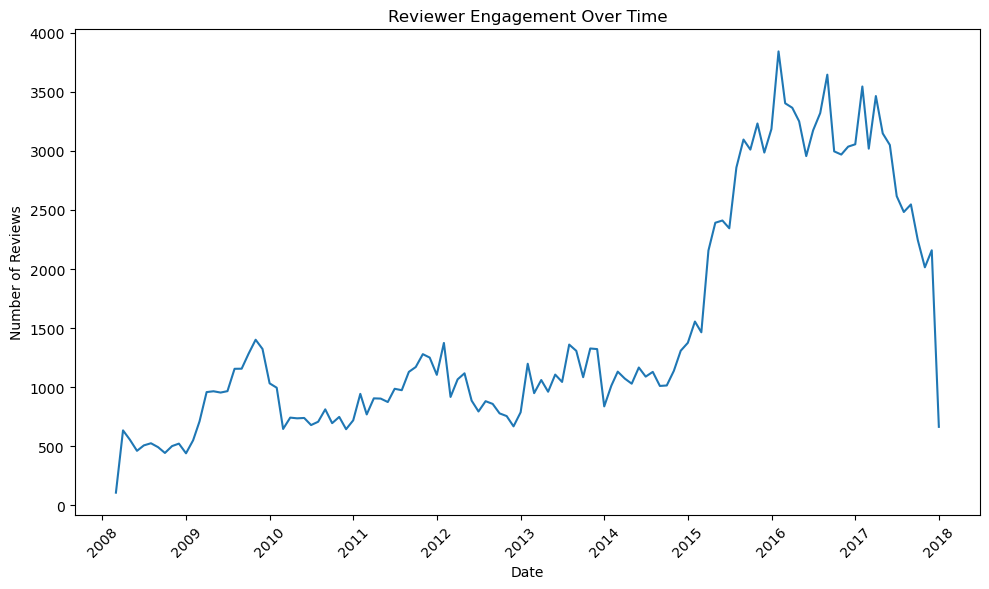

In [85]:
# Group the data by month and count the number of reviews
monthly_review_counts = df.groupby(pd.Grouper(key='date', freq='M')).size()

# Plot the reviewer engagement over time
plt.figure(figsize=(10, 6))
plt.plot(monthly_review_counts.index, monthly_review_counts.values)
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.title('Reviewer Engagement Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The engagement peaks at 2016. Moreover, can we can see a clearn jump in 2015. We can assume there was an increase of users to the site due to several reasons. 

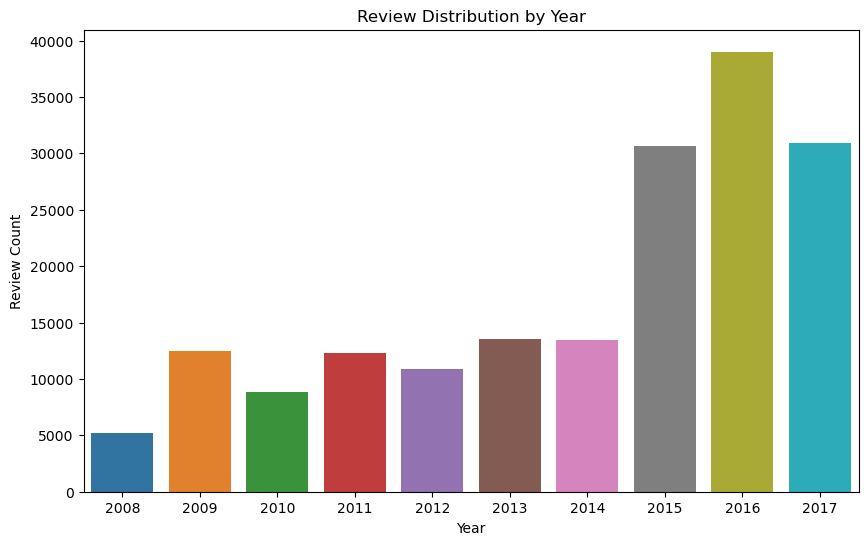

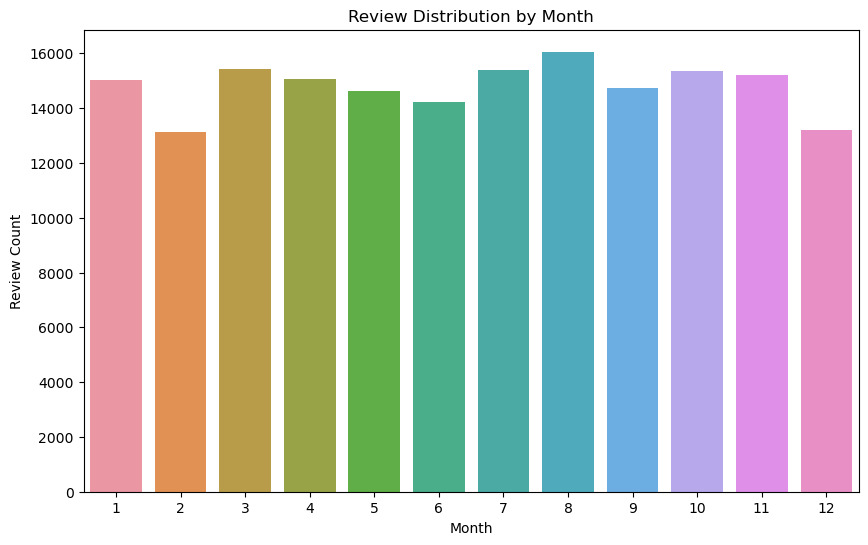

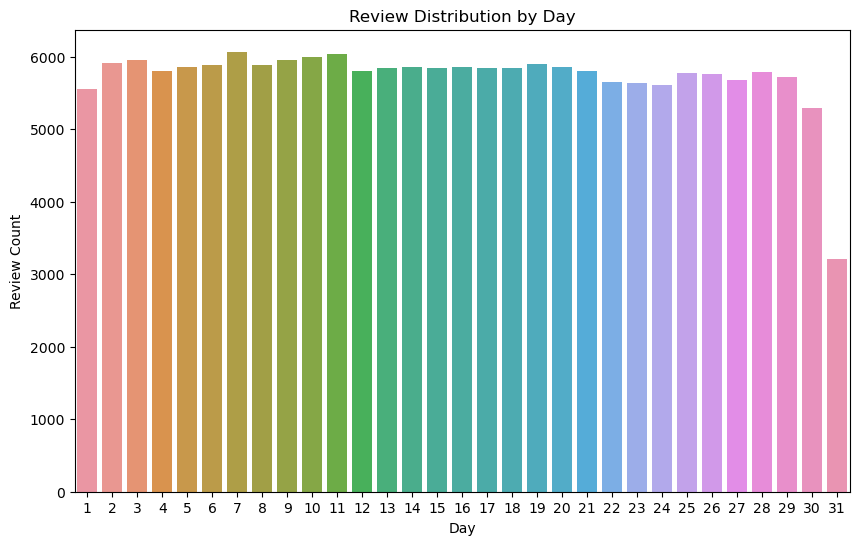

In [86]:
# Extract year, month, and day from the 'date' column
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Plot the distribution of reviews by year
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='year')
plt.xlabel('Year')
plt.ylabel('Review Count')
plt.title('Review Distribution by Year')
plt.show()

# Plot the distribution of reviews by month
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='month')
plt.xlabel('Month')
plt.ylabel('Review Count')
plt.title('Review Distribution by Month')
plt.show()

# Plot the distribution of reviews by day
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='day')
plt.xlabel('Day')
plt.ylabel('Review Count')
plt.title('Review Distribution by Day')
plt.show()


Day of the Week Analysis

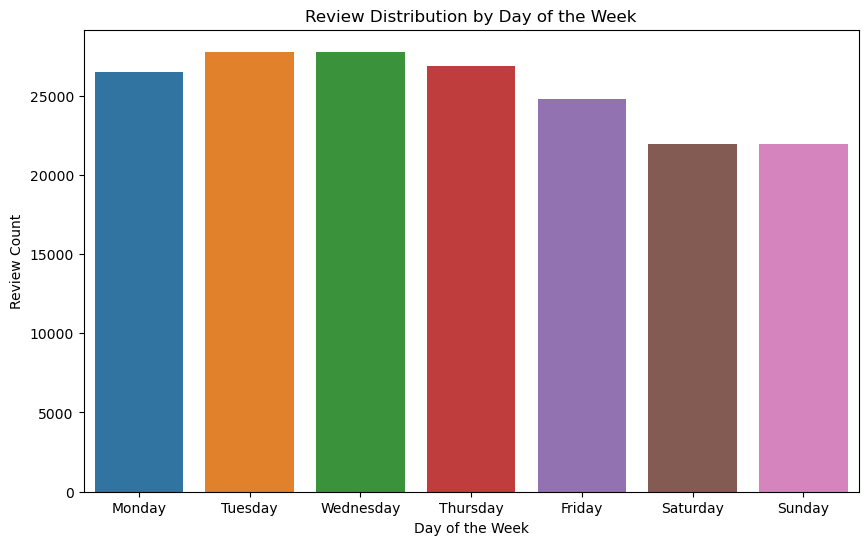

In [87]:
# Extract the day of the week from the 'date' column
df['day_of_week'] = df['date'].dt.day_name()

# Plot the distribution of reviews by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='day_of_week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel('Day of the Week')
plt.ylabel('Review Count')
plt.title('Review Distribution by Day of the Week')
plt.show()


## End of EDA

In this exploratory data analysis (EDA) phase, we delved into the dataset and gained valuable insights into the pharmaceutical domain. By examining the distribution of conditions, we identified the top 10% conditions that dominate the dataset, with birth control being the most prevalent. This knowledge allows us to tailor our analysis and understand the focus of the reviews. Additionally, we analyzed the count of unique drugs per condition, uncovering the diversity of medications available for different conditions. Furthermore, by exploring the ratings, we observed a skewed distribution with varying levels of user satisfaction. This information provides pharmaceutical companies with actionable insights to enhance drug effectiveness, improve patient experiences, and refine marketing strategies. Our EDA lays the foundation for the subsequent stages of the project, enabling us to develop robust methodologies and solutions to address our research objectives."

We wil output the result of this EDA notebook and save it, as we did smoe preprocesing and will use this output in the following section Preprocessing.

In [88]:
# Assuming your DataFrame is named df
df.to_csv('Preprocess_Drug.csv', index=False)
